# Analysis of HEMCO Emissions

In [2]:
# calculate anthropogenic emissions of relevant compounds (SO2, SO4, NO, BCPI, BCPO, OCPI, OCPO, DST1, and NH3)
# over the UK for the three data scenarios.

# Load frequently used packages for data analysis
import os
import glob
import numpy  as np
import pandas 
import xarray as xr
import geopandas as gpd
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from gamap_colormap import WhGrYlRd

# Load frequently used packages for data visualisations
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [257]:
# there are three scenarios that we need to analyze
scenarios=["baseline","cle","mtf"]

In [13]:
# SO2, SO4, NO, BCPI, BCPO, OCPI, OCPO, DST1, and NH3 that we need to analyze
compounds = ["SO2","SO4", "NO", "BCPI", "BCPO", "OCPI", "OCPO", "DST1", "NH3"]

In [16]:
# function: convert xarray data arrays to a single pandas dataframe 
def xr_to_df(data):
    data = data.to_dataframe()
    data.reset_index(inplace=True)
    return data

In [17]:
# import UK_land_mask 
GC = xr.open_dataset("D:/Jupyter code/uk-land-mask-025x03125.nc")
GC = GC.sel(lat=slice(49.25,59.5),lon=slice(-9.375,2.188))
pandas.set_option('display.max_rows', None)
display(GC)

<xarray.Dataset>
Dimensions:  (lat: 42, lon: 38)
Coordinates:
  * lon      (lon) float32 -9.375 -9.062 -8.75 -8.438 ... 1.25 1.562 1.875 2.188
  * lat      (lat) float32 49.25 49.5 49.75 50.0 50.25 ... 58.75 59.0 59.25 59.5
Data variables:
    uk-mask  (lat, lon) float32 ...

In [265]:
for chosen_scenario in scenarios:
    path="D:/Jupyter code/GEOS-CHEM/" + chosen_scenario +  "_uk_nest/HEMCO*.nc"
    
    # calculate the average PM2.5 
    locals()[chosen_scenario]  = sorted(glob.glob(path))
    locals()[chosen_scenario + "_HEMCO_data"]  = [xr.open_dataset(file) for file in vars()[chosen_scenario]]
    
    # extract the grid box surface area values (unit: m^2), the area is fixed for each grid, so we only need to read it once
    grid_area = locals()[chosen_scenario + "_HEMCO_data"][0]['AREA']
    
    # for each grid, sum all emissions onto the first level (unit: kg/m2/s) 
    # as we are quantifying the total, not the vertical distributions
    locals()[chosen_scenario + "NO_emissions_rate"]= [data['EmisNO_Total'].sum(dim='lev') for data in locals()[chosen_scenario + "_HEMCO_data"]]
    locals()[chosen_scenario + "SO2_emissions_rate"]= [data['EmisSO2_Total'].sum(dim='lev') for data in locals()[chosen_scenario + "_HEMCO_data"]]
    locals()[chosen_scenario + "SO4_emissions_rate"]= [data['EmisSO4_Total'].sum(dim='lev') for data in locals()[chosen_scenario + "_HEMCO_data"]]
    locals()[chosen_scenario + "BCPI_emissions_rate"]= [data['EmisBCPI_Total'].sum(dim='lev') for data in locals()[chosen_scenario + "_HEMCO_data"]]
    locals()[chosen_scenario + "BCPO_emissions_rate"]= [data['EmisBCPO_Total'] for data in locals()[chosen_scenario + "_HEMCO_data"]]
    locals()[chosen_scenario + "OCPI_emissions_rate"]= [data['EmisOCPI_Total'].sum(dim='lev') for data in locals()[chosen_scenario + "_HEMCO_data"]]
    locals()[chosen_scenario + "OCPO_emissions_rate"]= [data['EmisOCPO_Total'] for data in locals()[chosen_scenario + "_HEMCO_data"]]
    locals()[chosen_scenario + "DST1_emissions_rate"]= [data['EmisDST1_Total'] for data in locals()[chosen_scenario + "_HEMCO_data"]]
    locals()[chosen_scenario + "NH3_emissions_rate"]= [data['EmisNH3_Total'].sum(dim='lev') for data in locals()[chosen_scenario + "_HEMCO_data"]]
    
    # Calculate compounds' annual and monthly emissions
    for compound in compounds:
        locals()[chosen_scenario + compound + "_month01"] = locals()[chosen_scenario + compound + "_emissions_rate"][0].isel(time=0)*grid_area*60*60*24*31*GC["uk-mask"]
        locals()[chosen_scenario + compound + "_month02"]  = locals()[chosen_scenario + compound + "_emissions_rate"][1].isel(time=0)*grid_area*60*60*24*28*GC["uk-mask"]
        locals()[chosen_scenario + compound + "_month03"]  = locals()[chosen_scenario + compound + "_emissions_rate"][2].isel(time=0)*grid_area*60*60*24*31*GC["uk-mask"]
        locals()[chosen_scenario + compound + "_month04"]  = locals()[chosen_scenario + compound + "_emissions_rate"][3].isel(time=0)*grid_area*60*60*24*30*GC["uk-mask"]
        locals()[chosen_scenario + compound + "_month05"]  = locals()[chosen_scenario + compound + "_emissions_rate"][4].isel(time=0)*grid_area*60*60*24*31*GC["uk-mask"]
        locals()[chosen_scenario + compound + "_month06"]  = locals()[chosen_scenario + compound + "_emissions_rate"][5].isel(time=0)*grid_area*60*60*24*30*GC["uk-mask"]
        locals()[chosen_scenario + compound + "_month07"]  = locals()[chosen_scenario + compound + "_emissions_rate"][6].isel(time=0)*grid_area*60*60*24*31*GC["uk-mask"]
        locals()[chosen_scenario + compound + "_month08"]  = locals()[chosen_scenario + compound + "_emissions_rate"][7].isel(time=0)*grid_area*60*60*24*31*GC["uk-mask"]
        locals()[chosen_scenario + compound + "_month09"]  = locals()[chosen_scenario + compound + "_emissions_rate"][8].isel(time=0)*grid_area*60*60*24*30*GC["uk-mask"]
        locals()[chosen_scenario + compound + "_month10"]  = locals()[chosen_scenario + compound + "_emissions_rate"][9].isel(time=0)*grid_area*60*60*24*31*GC["uk-mask"]
        locals()[chosen_scenario + compound + "_month11"]  = locals()[chosen_scenario + compound + "_emissions_rate"][10].isel(time=0)*grid_area*60*60*24*30*GC["uk-mask"]
        locals()[chosen_scenario + compound + "_month12"]  = locals()[chosen_scenario + compound + "_emissions_rate"][11].isel(time=0)*grid_area*60*60*24*31*GC["uk-mask"]
        locals()[chosen_scenario + compound + "_annual_sum"] = locals()[chosen_scenario + compound + "_month01"] + locals()[chosen_scenario + compound + "_month02"]
        + locals()[chosen_scenario + compound + "_month03"] + locals()[chosen_scenario + compound + "_month04"] + locals()[chosen_scenario + compound + "_month05"]
        + locals()[chosen_scenario + compound + "_month06"] + locals()[chosen_scenario + compound + "_month07"] + locals()[chosen_scenario + compound + "_month08"]
        + locals()[chosen_scenario + compound + "_month09"] + locals()[chosen_scenario + compound + "_month10"] + locals()[chosen_scenario + compound + "_month11"]
        + locals()[chosen_scenario + compound + "_month12"]
        locals()[chosen_scenario + compound + "_annual_sum"] = locals()[chosen_scenario + compound + "_annual_sum"].sum().values       
        locals()[chosen_scenario + compound + "_monthly_sum"] = [locals()[chosen_scenario + compound + "_month01"].sum().values, locals()[chosen_scenario + compound + "_month02"].sum().values,
                                                                 locals()[chosen_scenario + compound + "_month03"].sum().values,locals()[chosen_scenario + compound + "_month04"].sum().values,
                                                                 locals()[chosen_scenario + compound + "_month05"].sum().values,locals()[chosen_scenario + compound + "_month06"].sum().values,
                                                                 locals()[chosen_scenario + compound + "_month07"].sum().values,locals()[chosen_scenario + compound + "_month08"].sum().values,
                                                                 locals()[chosen_scenario + compound + "_month09"].sum().values,locals()[chosen_scenario + compound + "_month10"].sum().values,
                                                                 locals()[chosen_scenario + compound + "_month11"].sum().values,locals()[chosen_scenario + compound + "_month12"].sum().values]
    
    # divide the compounds into two parts to show them clearly (two duifferent y_axis)
#     locals()[chosen_scenario +  "_annual_sum" +"_L"] = [locals()[chosen_scenario + "BCPI" + "_annual_sum"],locals()[chosen_scenario + "BCPO" + "_annual_sum"],locals()[chosen_scenario + "OCPI" + "_annual_sum"],
#                                                  locals()[chosen_scenario + "OCPO" + "_annual_sum"]]                                                 
#     locals()[chosen_scenario +  "_annual_sum" +"_S"] = [locals()[chosen_scenario + "SO2" + "_annual_sum"],locals()[chosen_scenario + "SO4" + "_annual_sum"],locals()[chosen_scenario + "NO" + "_annual_sum"],
#                                                         locals()[chosen_scenario + "DST1" + "_annual_sum"],locals()[chosen_scenario + "NH3" + "_annual_sum"]]
 
    
    
####################################################################################################################    
    # calculate emissions from different sources in three data scenarios
        if compound == "SO2":
            locals()["sources"] = ["VolcDegas","VolcErupt","Ship","BioBurn","Anthro","Aircraft"]
        if compound == "SO4":
            locals()["sources"] = ["Ship","Anthro","Aircraft"]
        if compound == "NO": 
            locals()["sources"] = ["Soil","Ship","Lightning","BioBurn","Anthro","Aircraft"]
        if compound == "BCPI":
            locals()["sources"] = ["Ship","BioBurn","Anthro","Aircraft"]
        if compound == "BCPO":
            locals()["sources"] = ["Ship","BioBurn","Anthro"]
        if compound == "OCPI":
            locals()["sources"] = ["Ship","BioBurn","Anthro","Aircraft"]
        if compound == "OCPO":
            locals()["sources"] = ["Ship","BioBurn","Anthro"]
        if compound == "DST1":
            locals()["sources"] = ["Natural","Anthro"]
        if compound == "NH3":
            locals()["sources"] = ["Ship","Seabirds","Natural","BioBurn","Anthro"]
        for source in sources:
            if "lev" in locals()[chosen_scenario + "_HEMCO_data"][0]['Emis' + compound + "_" + source].dims:
                locals()[chosen_scenario + compound + source + "_month01"]= locals()[chosen_scenario + "_HEMCO_data"][0]['Emis' + compound + "_" + source].sum(dim='lev')*grid_area*60*60*24*31*GC["uk-mask"]
                locals()[chosen_scenario + compound + source + "_month02"]= locals()[chosen_scenario + "_HEMCO_data"][1]['Emis' + compound + "_" + source].sum(dim='lev')*grid_area*60*60*24*28*GC["uk-mask"]
                locals()[chosen_scenario + compound + source + "_month03"]= locals()[chosen_scenario + "_HEMCO_data"][2]['Emis' + compound + "_" + source].sum(dim='lev')*grid_area*60*60*24*31*GC["uk-mask"]
                locals()[chosen_scenario + compound + source + "_month04"]= locals()[chosen_scenario + "_HEMCO_data"][3]['Emis' + compound + "_" + source].sum(dim='lev')*grid_area*60*60*24*30*GC["uk-mask"]
                locals()[chosen_scenario + compound + source + "_month05"]= locals()[chosen_scenario + "_HEMCO_data"][4]['Emis' + compound + "_" + source].sum(dim='lev')*grid_area*60*60*24*31*GC["uk-mask"]
                locals()[chosen_scenario + compound + source + "_month06"]= locals()[chosen_scenario + "_HEMCO_data"][5]['Emis' + compound + "_" + source].sum(dim='lev')*grid_area*60*60*24*30*GC["uk-mask"]
                locals()[chosen_scenario + compound + source + "_month07"]= locals()[chosen_scenario + "_HEMCO_data"][6]['Emis' + compound + "_" + source].sum(dim='lev')*grid_area*60*60*24*31*GC["uk-mask"]
                locals()[chosen_scenario + compound + source + "_month08"]= locals()[chosen_scenario + "_HEMCO_data"][7]['Emis' + compound + "_" + source].sum(dim='lev')*grid_area*60*60*24*31*GC["uk-mask"]
                locals()[chosen_scenario + compound + source + "_month09"]= locals()[chosen_scenario + "_HEMCO_data"][8]['Emis' + compound + "_" + source].sum(dim='lev')*grid_area*60*60*24*30*GC["uk-mask"]
                locals()[chosen_scenario + compound + source + "_month10"]= locals()[chosen_scenario + "_HEMCO_data"][9]['Emis' + compound + "_" + source].sum(dim='lev')*grid_area*60*60*24*31*GC["uk-mask"]
                locals()[chosen_scenario + compound + source + "_month11"]= locals()[chosen_scenario + "_HEMCO_data"][10]['Emis' + compound + "_" + source].sum(dim='lev')*grid_area*60*60*24*30*GC["uk-mask"]
                locals()[chosen_scenario + compound + source + "_month12"]= locals()[chosen_scenario + "_HEMCO_data"][11]['Emis' + compound + "_" + source].sum(dim='lev')*grid_area*60*60*24*31*GC["uk-mask"]
            else:
                locals()[chosen_scenario + compound + source + "_month01"]= locals()[chosen_scenario + "_HEMCO_data"][0]['Emis' + compound + "_" + source]*grid_area*60*60*24*31*GC["uk-mask"]
                locals()[chosen_scenario + compound + source + "_month02"]= locals()[chosen_scenario + "_HEMCO_data"][1]['Emis' + compound + "_" + source]*grid_area*60*60*24*28*GC["uk-mask"]
                locals()[chosen_scenario + compound + source + "_month03"]= locals()[chosen_scenario + "_HEMCO_data"][2]['Emis' + compound + "_" + source]*grid_area*60*60*24*31*GC["uk-mask"]
                locals()[chosen_scenario + compound + source + "_month04"]= locals()[chosen_scenario + "_HEMCO_data"][3]['Emis' + compound + "_" + source]*grid_area*60*60*24*30*GC["uk-mask"]
                locals()[chosen_scenario + compound + source + "_month05"]= locals()[chosen_scenario + "_HEMCO_data"][4]['Emis' + compound + "_" + source]*grid_area*60*60*24*31*GC["uk-mask"]
                locals()[chosen_scenario + compound + source + "_month06"]= locals()[chosen_scenario + "_HEMCO_data"][5]['Emis' + compound + "_" + source]*grid_area*60*60*24*30*GC["uk-mask"]
                locals()[chosen_scenario + compound + source + "_month07"]= locals()[chosen_scenario + "_HEMCO_data"][6]['Emis' + compound + "_" + source]*grid_area*60*60*24*31*GC["uk-mask"]
                locals()[chosen_scenario + compound + source + "_month08"]= locals()[chosen_scenario + "_HEMCO_data"][7]['Emis' + compound + "_" + source]*grid_area*60*60*24*31*GC["uk-mask"]
                locals()[chosen_scenario + compound + source + "_month09"]= locals()[chosen_scenario + "_HEMCO_data"][8]['Emis' + compound + "_" + source]*grid_area*60*60*24*30*GC["uk-mask"]
                locals()[chosen_scenario + compound + source + "_month10"]= locals()[chosen_scenario + "_HEMCO_data"][9]['Emis' + compound + "_" + source]*grid_area*60*60*24*31*GC["uk-mask"]
                locals()[chosen_scenario + compound + source + "_month11"]= locals()[chosen_scenario + "_HEMCO_data"][10]['Emis' + compound + "_" + source]*grid_area*60*60*24*30*GC["uk-mask"]
                locals()[chosen_scenario + compound + source + "_month12"]= locals()[chosen_scenario + "_HEMCO_data"][11]['Emis' + compound + "_" + source]*grid_area*60*60*24*31*GC["uk-mask"]
            locals()[chosen_scenario + compound + source + "_monthly_sum"] = [locals()[chosen_scenario + compound + source + "_month01"].sum().values,locals()[chosen_scenario + compound + source + "_month02"].sum().values,
                                                                     locals()[chosen_scenario + compound + source + "_month03"].sum().values,locals()[chosen_scenario + compound + source + "_month04"].sum().values,
                                                                     locals()[chosen_scenario + compound + source + "_month05"].sum().values,locals()[chosen_scenario + compound + source + "_month06"].sum().values,
                                                                     locals()[chosen_scenario + compound + source + "_month07"].sum().values,locals()[chosen_scenario + compound + source + "_month08"].sum().values,
                                                                     locals()[chosen_scenario + compound + source + "_month09"].sum().values,locals()[chosen_scenario + compound + source + "_month10"].sum().values,
                                                                     locals()[chosen_scenario + compound + source + "_month11"].sum().values,locals()[chosen_scenario + compound + source + "_month12"].sum().values]
            locals()[chosen_scenario + compound + source + "_monthly_sum"] = np.divide(locals()[chosen_scenario + compound + source + "_monthly_sum"],1e6)
            
               
                    

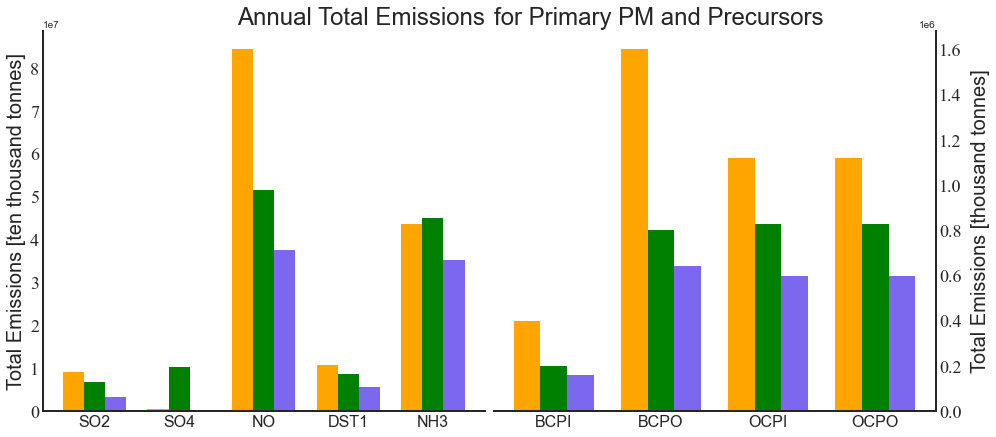

In [262]:
# plot histogram for compounds
compounds_L = [compounds[0],compounds[1],compounds[2],compounds[7],compounds[8]] 
compounds_S = [compounds[3],compounds[4],compounds[5],compounds[6]]
xticks1 = np.arange(len(compounds_L))
xticks2 = np.arange(len(compounds_S))
fig, ax = plt.subplots(figsize=(16, 7))
ax1 = plt.subplot(121)
ax1.bar(xticks1, locals()["baseline" + "_annual_sum_S"], width=0.25, label="baseline", color="orange")
ax1.bar(xticks1 + 0.25,  locals()["cle" + "_annual_sum_S"], width=0.25, label="cle", color="green")
ax1.bar(xticks1 + 0.5, locals()["mtf" + "_annual_sum_S"], width=0.25, label="mtf", color="mediumslateblue")
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xticks(xticks1 + 0.25)
ax1.set_title("Annual Total Emissions", fontsize=24, loc='right')
ax1.set_ylabel("Total Emissions [ten thousand tonnes]", fontsize=20)
ax1.set_xticklabels(compounds_L)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)
plt.xticks(fontsize=16) 
plt.yticks(fontsize=18,font='Times New Roman')
ax2 = plt.subplot(122)
ax2.bar(xticks2, locals()["baseline" + "_annual_sum_L"], width=0.25, label="baseline", color="orange")
ax2.bar(xticks2 + 0.25,  locals()["cle" + "_annual_sum_L"], width=0.25, label="cle", color="green")
ax2.bar(xticks2 + 0.5, locals()["mtf" + "_annual_sum_L"], width=0.25, label="mtf", color="mediumslateblue")
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_xticks(xticks2 + 0.25)
ax2.set_title("for Primary PM and Precursors ", fontsize=24, loc='left')
ax2.set_ylabel("Total Emissions [thousand tonnes]", fontsize=20,labelpad=9)
ax2.set_xticklabels(compounds_S)
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.spines['bottom'].set_linewidth(2)
ax2.spines['right'].set_linewidth(2)
plt.xticks(fontsize=16) 
plt.yticks(fontsize=18,font='Times New Roman')
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.02)
plt.savefig(f'D:/Jupyter code/PM output/Annual Total Emissions for Primary PM and Precursors.jpg',dpi = 100)



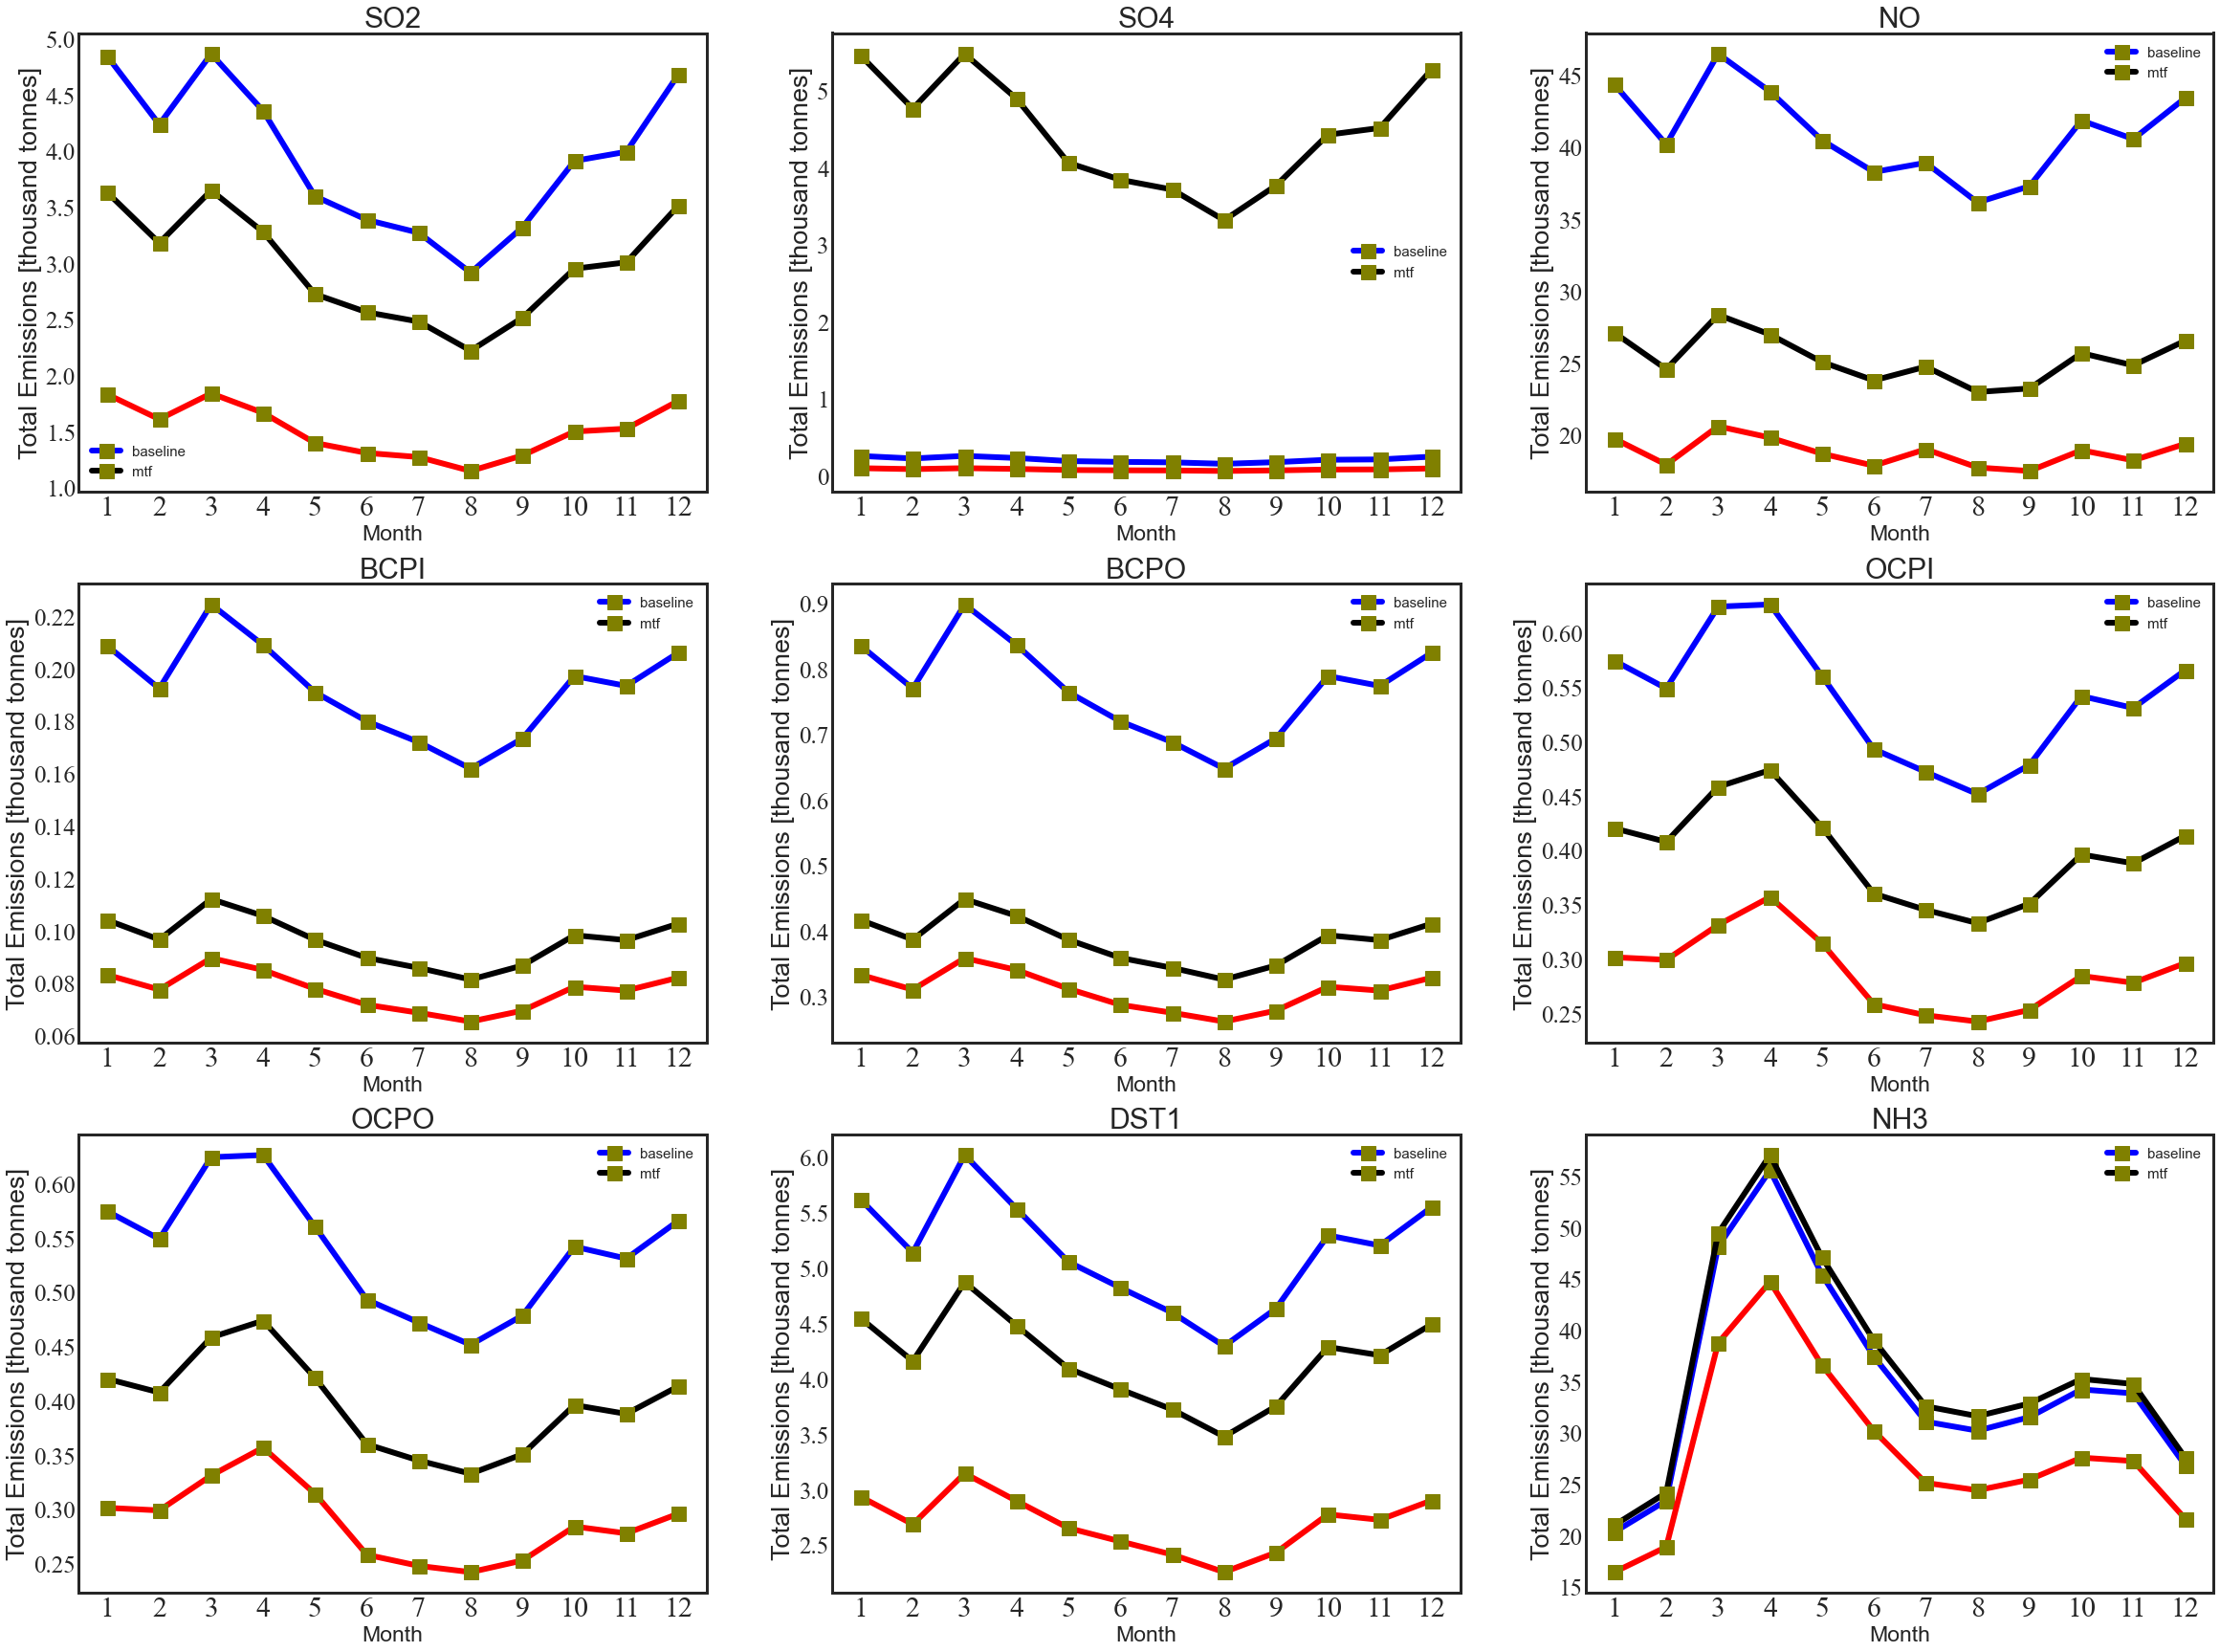

In [264]:
# plot seasonal variations of each compound
month = np.arange(1,13)
fig = plt.figure(figsize=[40,30])
for i in range(len(compounds)):
    ax = plt.subplot(331+i)
    plt.plot(month, np.divide(locals()["baseline" + compounds[i] + "_monthly_sum"],1e6), linestyle='-',linewidth=6,color='blue',marker='s',
         markersize = 15, markeredgecolor='olive',markerfacecolor='olive') 
    plt.plot(month, np.divide(locals()["cle" + compounds[i] + "_monthly_sum"],1e6), linestyle='-',linewidth=6,color='black',marker='s',
         markersize = 15, markeredgecolor='olive',markerfacecolor='olive')   
    plt.plot(month, np.divide(locals()["mtf" + compounds[i] + "_monthly_sum"],1e6), linestyle='-',linewidth=6,color='red',marker='s',
         markersize = 15, markeredgecolor='olive',markerfacecolor='olive')
    plt.xticks(month,fontsize=30,font='Times New Roman') 
    plt.yticks(fontsize=25,font='Times New Roman')
    plt.title(f'{compounds[i]}',fontsize=30)
    plt.ylabel('Total Emissions [thousand tonnes]',fontsize = 27)
    plt.xlabel('Month',fontsize = 23)
    plt.legend(["baseline","mtf"],loc='best',fontsize=15,frameon=False)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['left'].set_linewidth(3)
    ax.spines['top'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
    plt.savefig(f'D:/Jupyter code/PM output/monthly compounds.jpg',dpi = 100)



In [ ]:
# Color Settings for each Compound
#   Soil: peru                   Ship: darkseagreen        Lighting: purple      Bioburn: yellow  
#  Anthro: cornflowerblue       Aircraft: pink            VolcErupt: c          VolcDegas: saddlebrown
# Natural: red                 Seabirds: darkorange

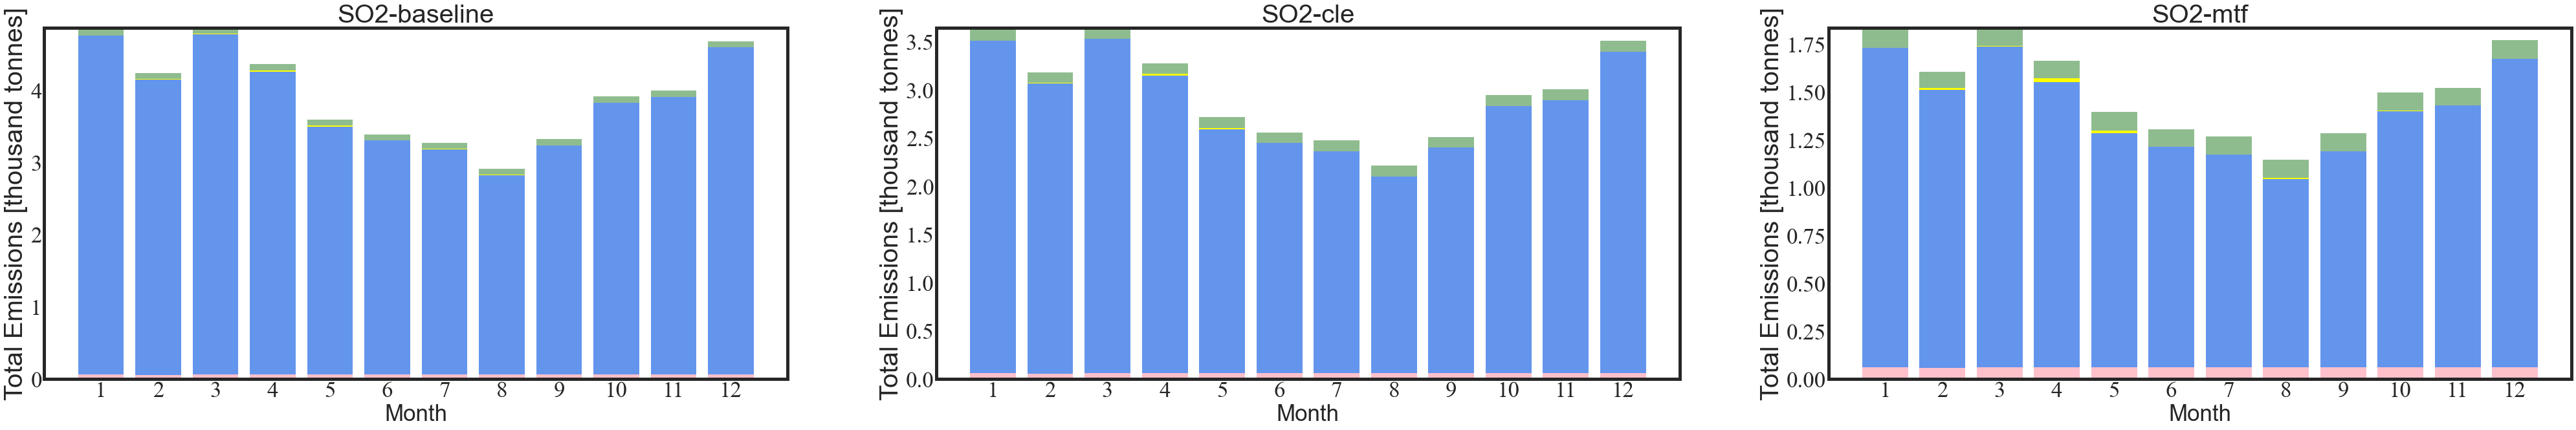

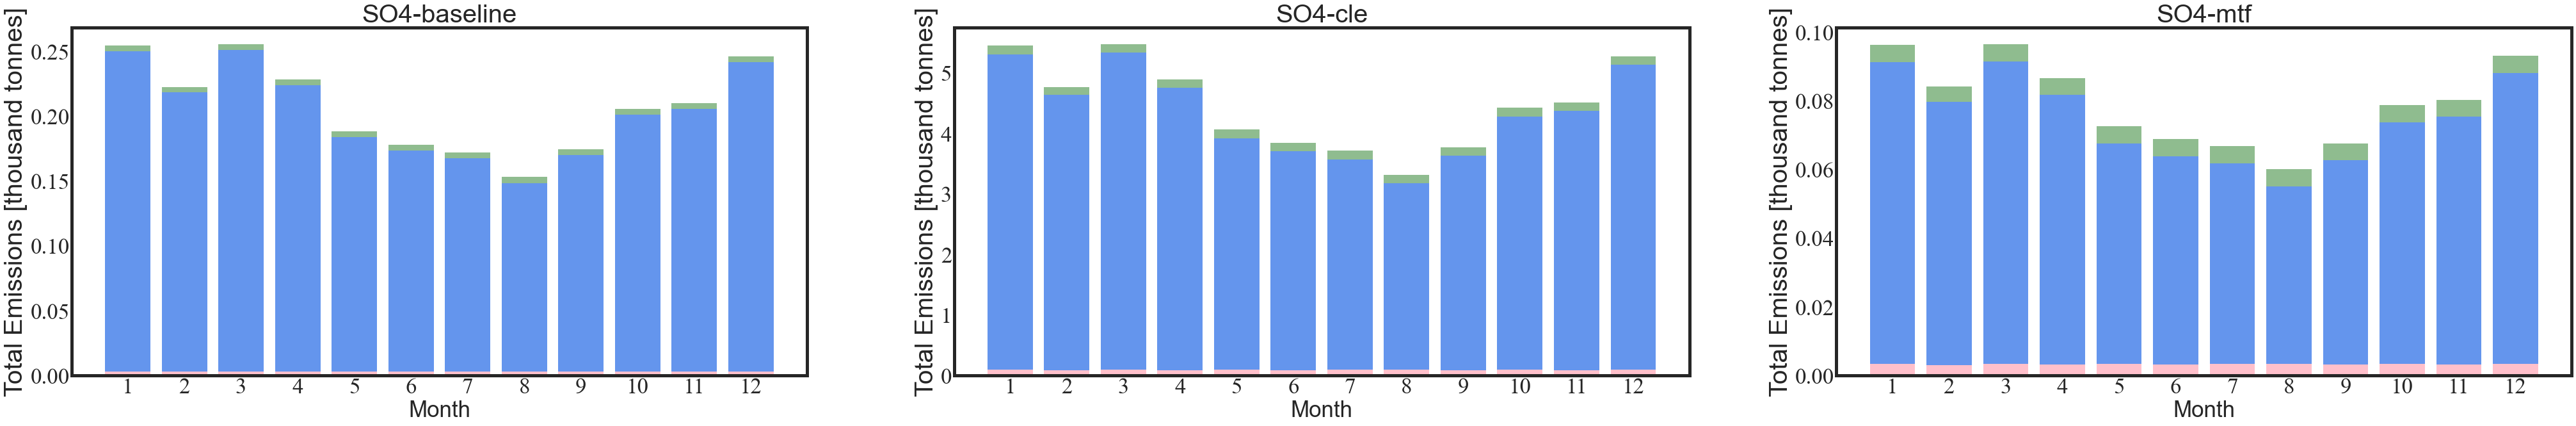

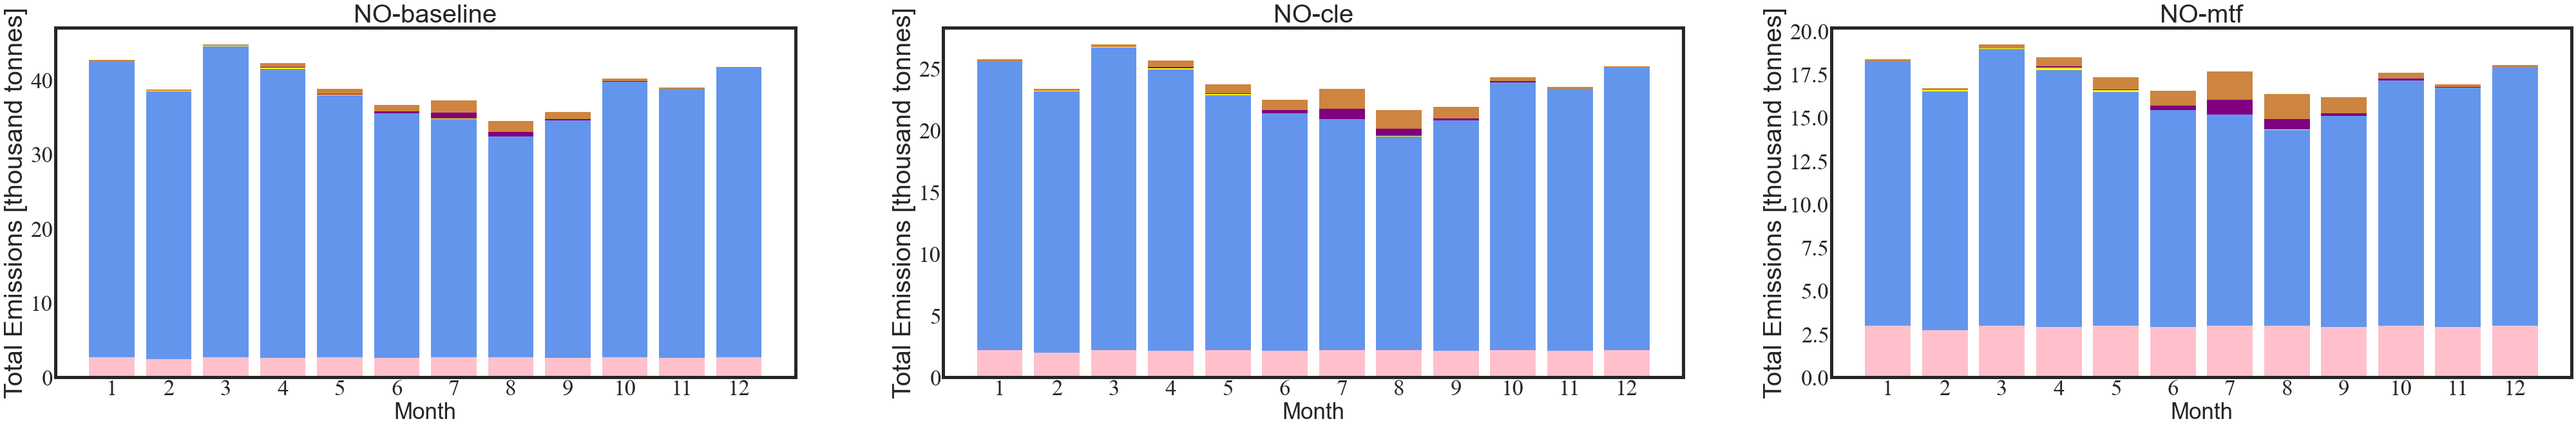

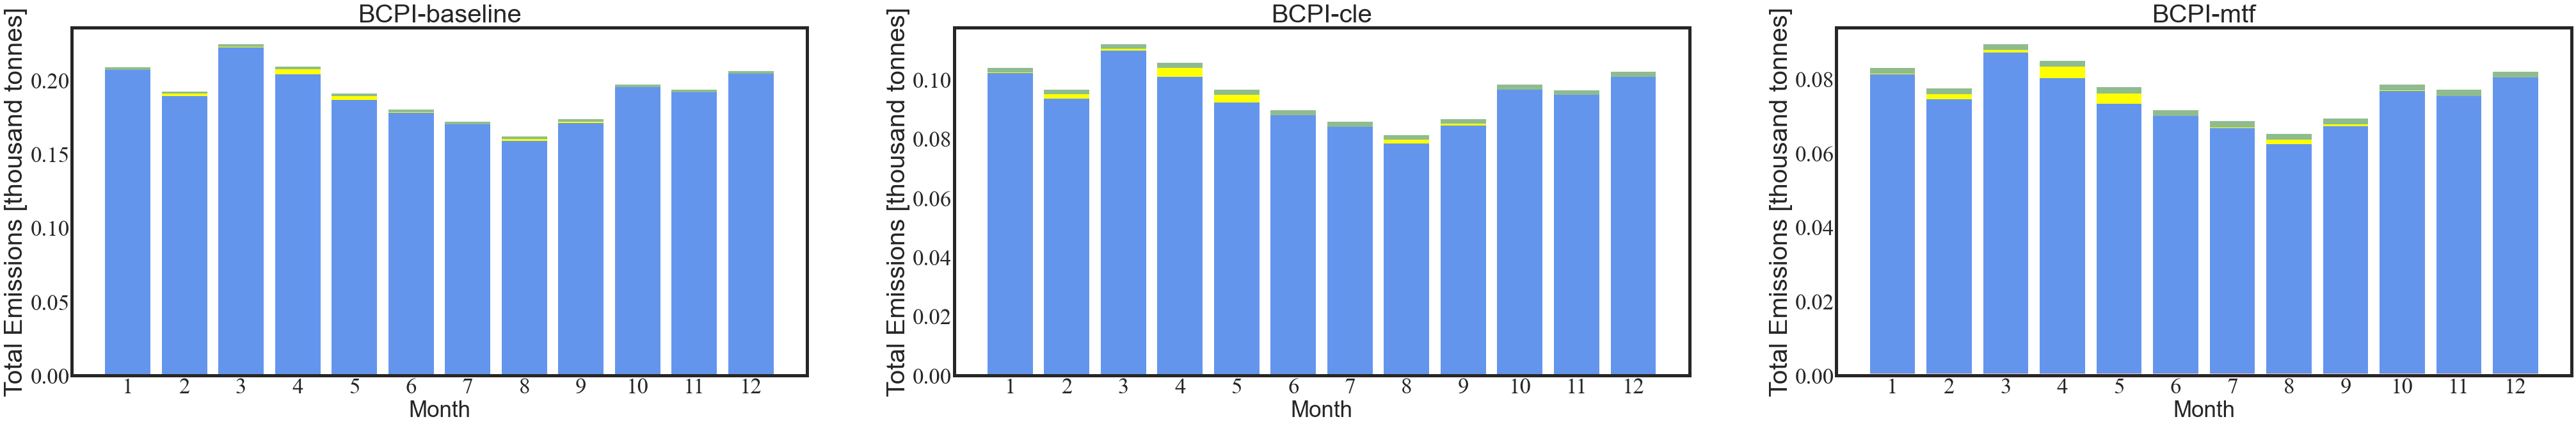

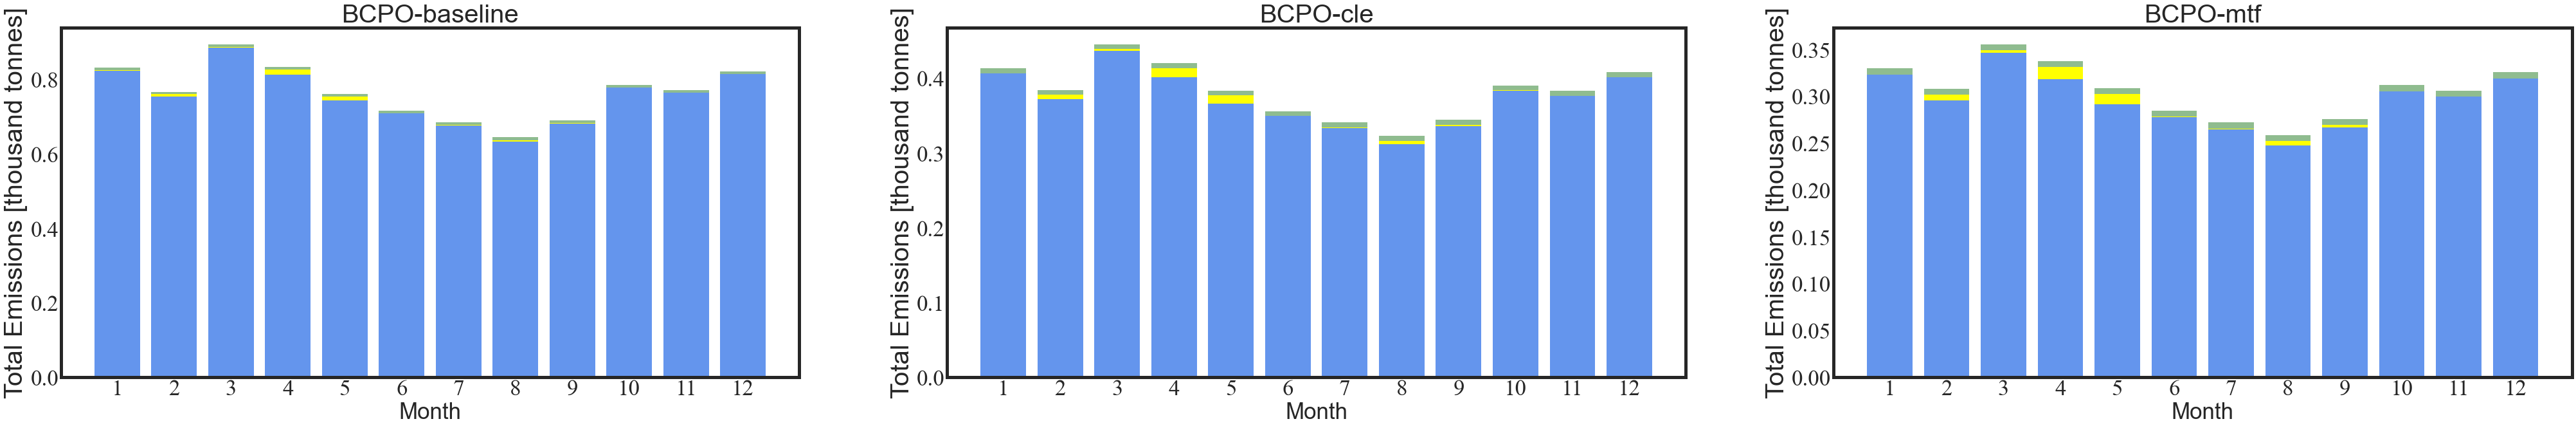

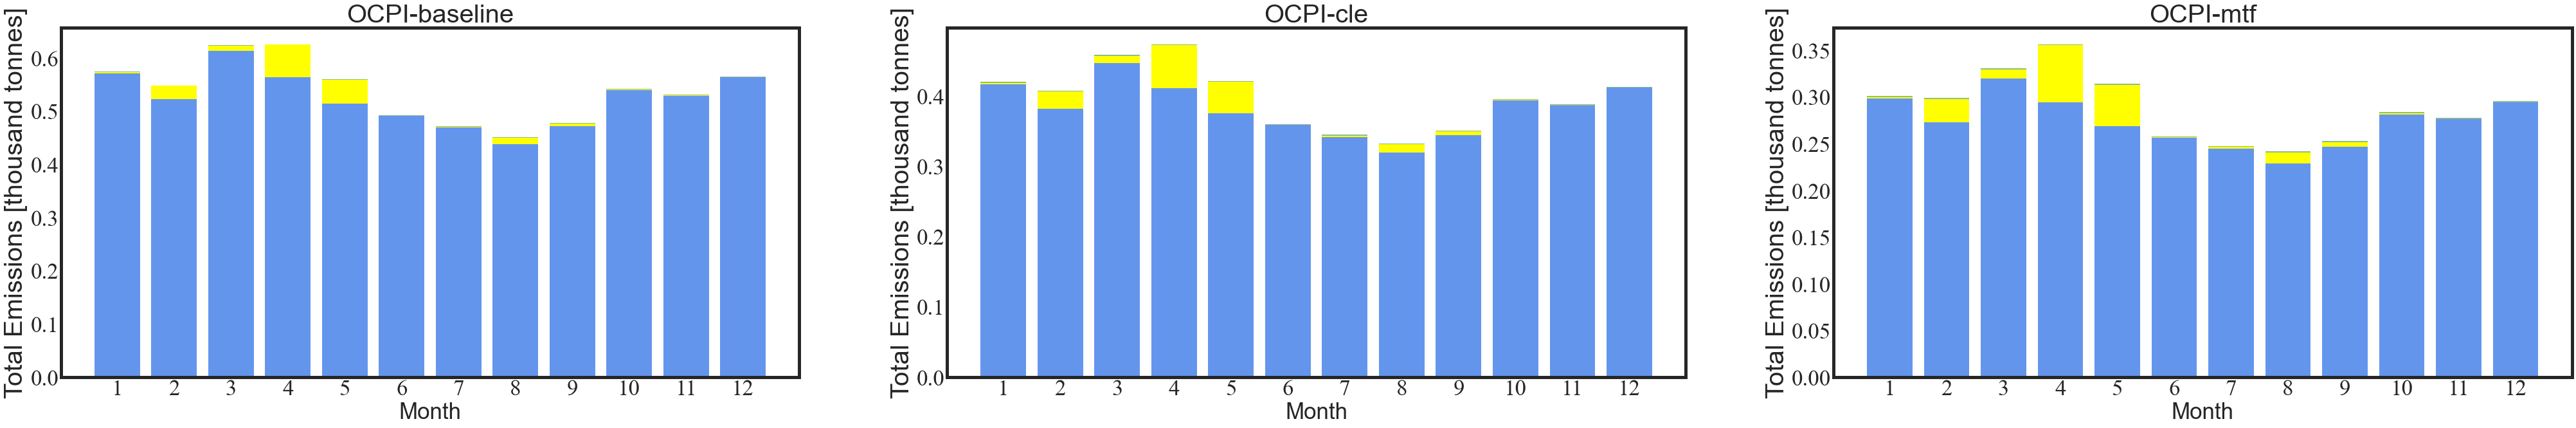

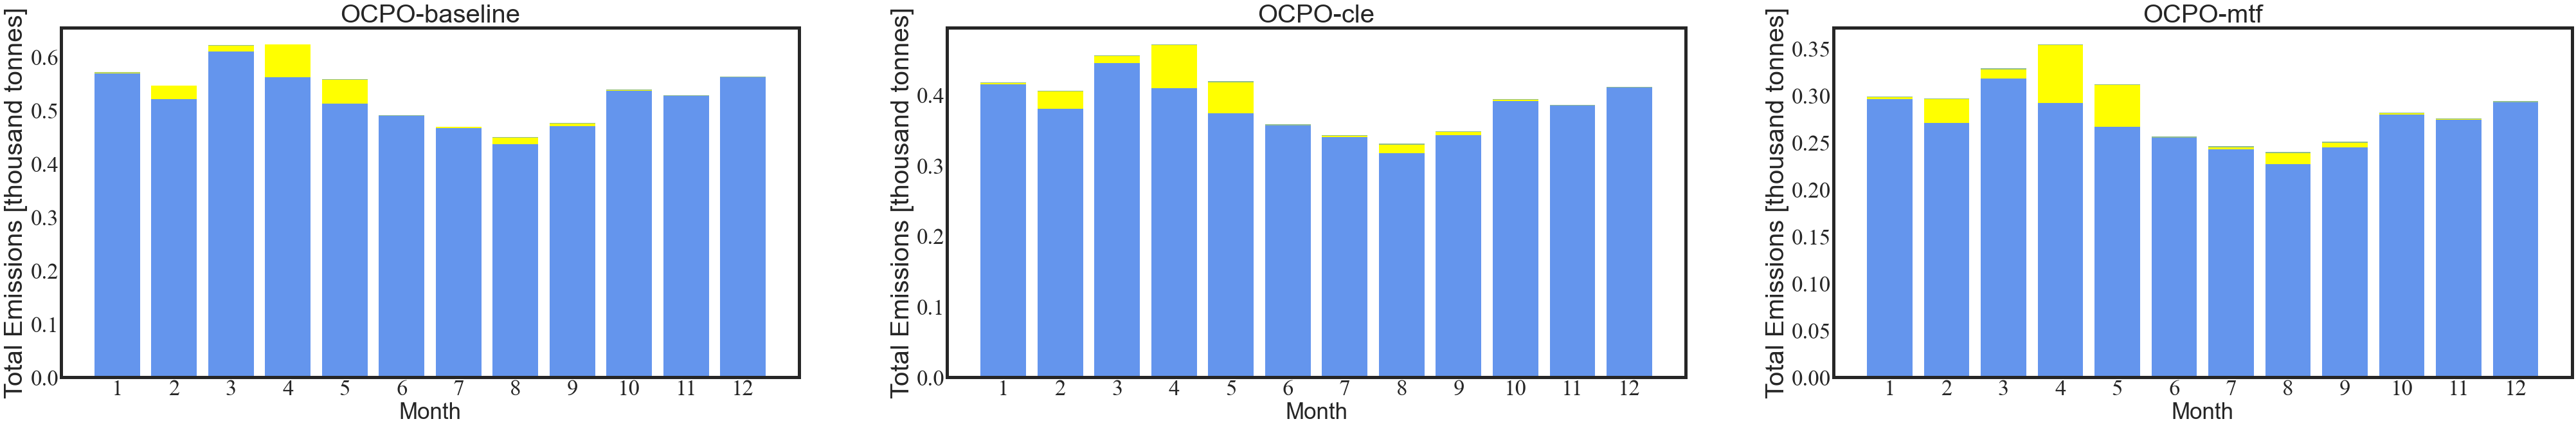

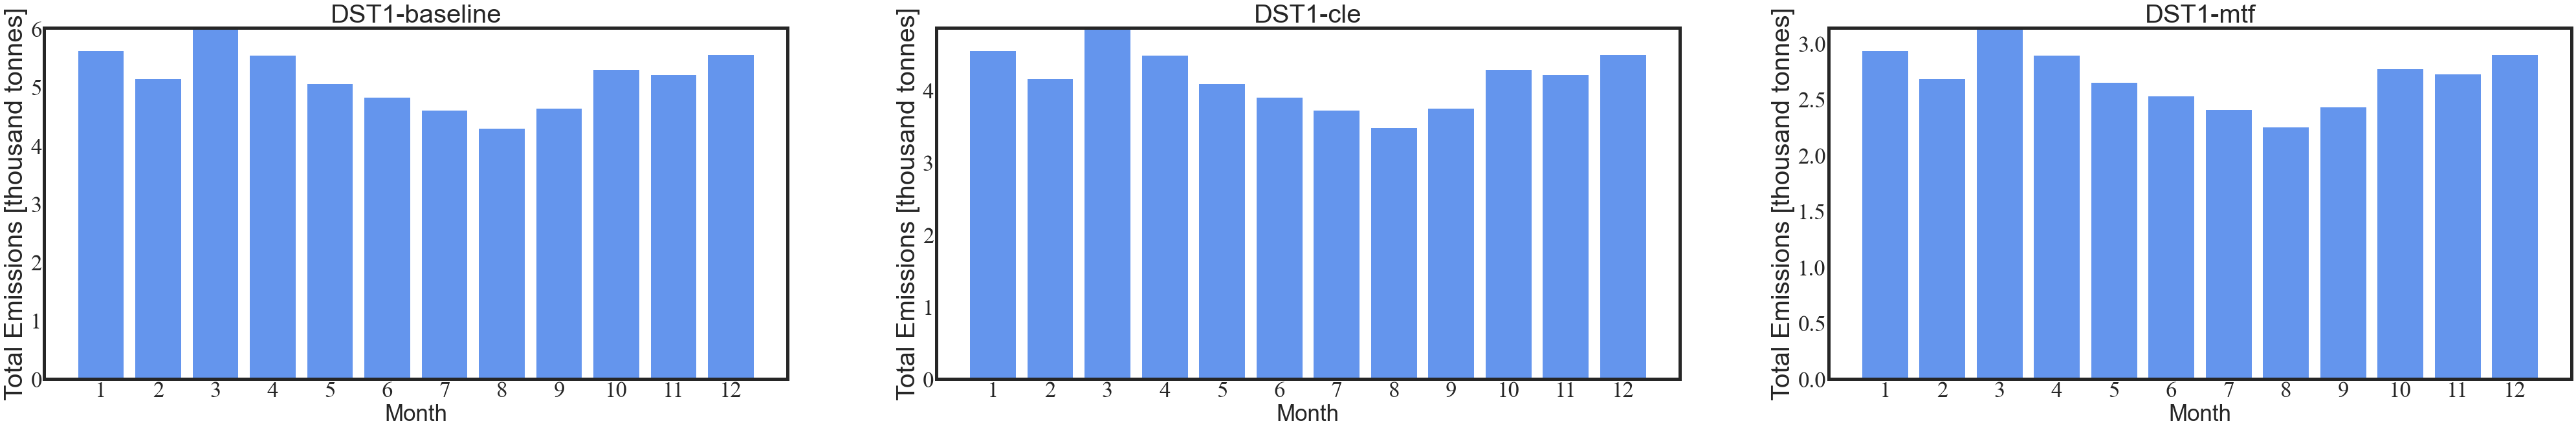

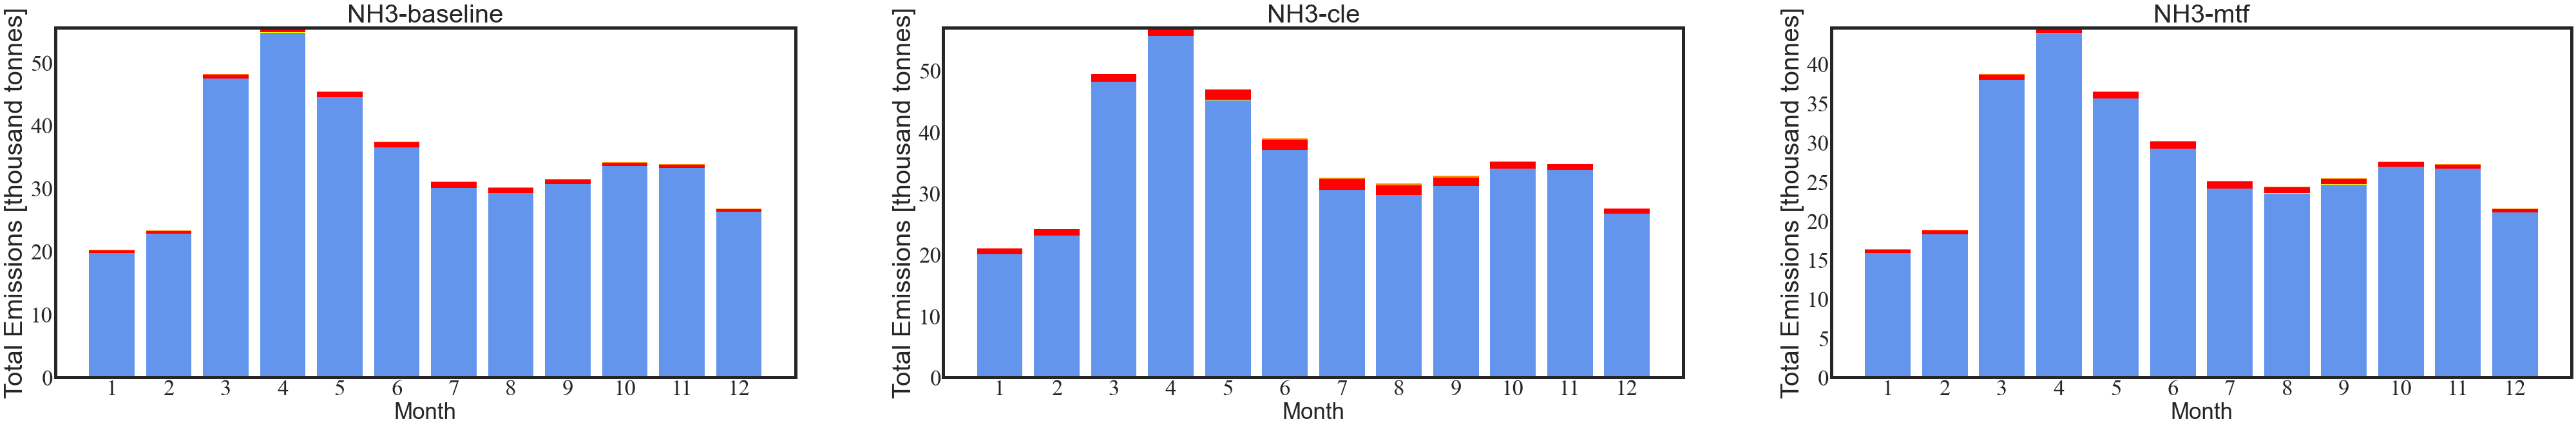

In [274]:
# plot stacked bar chart of each compound
for compound in compounds:
    fig, ax = plt.subplots(figsize=(70, 10))
    for i in range(len(scenarios)):
        ax = plt.subplot(131+i)
        if compound == "SO2":
            ax.bar(month, locals()[scenarios[i] + compound + "Aircraft" + "_monthly_sum"], color="pink", label="Aircraft")
            ax.bar(month, locals()[scenarios[i] + compound + "Anthro" + "_monthly_sum"], color="cornflowerblue", bottom=locals()[scenarios[i] + compound + "Aircraft" + "_monthly_sum"], label="Anthro")
            ax.bar(month, locals()[scenarios[i] + compound + "BioBurn" + "_monthly_sum"], color="yellow",bottom=np.array(locals()[scenarios[i] + compound + "Aircraft" + "_monthly_sum"]) + np.array(locals()[scenarios[i]+ compound + "Anthro" + "_monthly_sum"]), label="BioBurn")
            ax.bar(month, locals()[scenarios[i] + compound + "Ship" + "_monthly_sum"], color="darkseagreen",
                   bottom=np.array(locals()[scenarios[i] + compound + "Aircraft" + "_monthly_sum"]) + np.array(locals()[scenarios[i]+ compound + "Anthro" + "_monthly_sum"]) + np.array(locals()[scenarios[i] + compound + "BioBurn" + "_monthly_sum"]) , label="Ship")
            ax.bar(month, locals()[scenarios[i] + compound + "VolcDegas" + "_monthly_sum"], color="saddlebrown",
                   bottom=np.array(locals()[scenarios[i] + compound + "Aircraft" + "_monthly_sum"]) + np.array(locals()[scenarios[i]+ compound + "Anthro" + "_monthly_sum"]) + np.array(locals()[scenarios[i] + compound + "BioBurn" + "_monthly_sum"]) + np.array(locals()[scenarios[i] + compound + "Ship" + "_monthly_sum"]) , label="VolcErupt")
            ax.bar(month, locals()[scenarios[i] + compound + "VolcErupt" + "_monthly_sum"], color="c",
                   bottom=np.array(locals()[scenarios[i] + compound + "Aircraft" + "_monthly_sum"]) + np.array(locals()[scenarios[i]+ compound + "Anthro" + "_monthly_sum"]) + np.array(locals()[scenarios[i] + compound + "BioBurn" + "_monthly_sum"]) + np.array(locals()[scenarios[i] + compound + "Ship" + "_monthly_sum"]) + np.array(locals()[scenarios[i] + compound + "VolcErupt" + "_monthly_sum"]) , label="VolcDegas")
        if compound == "SO4":
            ax.bar(month, locals()[scenarios[i] + compound + "Aircraft" + "_monthly_sum"], color="pink", label="Aircraft")
            ax.bar(month, locals()[scenarios[i] + compound + "Anthro" + "_monthly_sum"], color="cornflowerblue", bottom=locals()[scenarios[i] + compound + "Aircraft" + "_monthly_sum"], label="Anthro")
            ax.bar(month, locals()[scenarios[i] + compound + "Ship" + "_monthly_sum"], color="darkseagreen",
                   bottom=np.array(locals()[scenarios[i] + compound + "Aircraft" + "_monthly_sum"]) + np.array(locals()[scenarios[i]+ compound + "Anthro" + "_monthly_sum"]), label="Ship")
        if compound == "NO": 
            ax.bar(month, locals()[scenarios[i] + compound + "Aircraft" + "_monthly_sum"], color="pink", label="Aircraft")
            ax.bar(month, locals()[scenarios[i] + compound + "Anthro" + "_monthly_sum"], color="cornflowerblue", bottom=locals()[scenarios[i] + compound + "Aircraft" + "_monthly_sum"], label="Anthro")
            ax.bar(month, locals()[scenarios[i] + compound + "BioBurn" + "_monthly_sum"], color="yellow",
                   bottom=np.array(locals()[scenarios[i] + compound + "Aircraft" + "_monthly_sum"]) + np.array(locals()[scenarios[i]+ compound + "Anthro" + "_monthly_sum"]), label="BioBurn")
            ax.bar(month, locals()[scenarios[i] + compound + "Lightning" + "_monthly_sum"], color="purple",
                   bottom=np.array(locals()[scenarios[i] + compound + "Aircraft" + "_monthly_sum"]) + np.array(locals()[scenarios[i]+ compound + "Anthro" + "_monthly_sum"]) + np.array(locals()[scenarios[i]+ compound + "BioBurn" + "_monthly_sum"]), label="Lightning")
            ax.bar(month, locals()[scenarios[i] + compound + "Ship" + "_monthly_sum"], color="darkseagreen",
                   bottom=np.array(locals()[scenarios[i] + compound + "Aircraft" + "_monthly_sum"]) + np.array(locals()[scenarios[i]+ compound + "Anthro" + "_monthly_sum"]) + np.array(locals()[scenarios[i]+ compound + "BioBurn" + "_monthly_sum"]) + np.array(locals()[scenarios[i]+ compound + "Lightning" + "_monthly_sum"]), label="Ship")
            ax.bar(month, locals()[scenarios[i] + compound + "Soil" + "_monthly_sum"], color="peru",
                   bottom=np.array(locals()[scenarios[i] + compound + "Aircraft" + "_monthly_sum"]) + np.array(locals()[scenarios[i]+ compound + "Anthro" + "_monthly_sum"]) + np.array(locals()[scenarios[i]+ compound + "BioBurn" + "_monthly_sum"]) + np.array(locals()[scenarios[i]+ compound + "Lightning" + "_monthly_sum"]) + np.array(locals()[scenarios[i]+ compound + "Ship" + "_monthly_sum"]), label="Soil")
        if compound == "BCPI":
            ax.bar(month, locals()[scenarios[i] + compound + "Aircraft" + "_monthly_sum"], color="pink", label="Aircraft")
            ax.bar(month, locals()[scenarios[i] + compound + "Anthro" + "_monthly_sum"], color="cornflowerblue", bottom=locals()[scenarios[i] + compound + "Aircraft" + "_monthly_sum"], label="Anthro")
            ax.bar(month, locals()[scenarios[i] + compound + "BioBurn" + "_monthly_sum"], color="yellow",
                   bottom=np.array(locals()[scenarios[i] + compound + "Aircraft" + "_monthly_sum"]) + np.array(locals()[scenarios[i]+ compound + "Anthro" + "_monthly_sum"]), label="BioBurn")
            ax.bar(month, locals()[scenarios[i] + compound + "Ship" + "_monthly_sum"], color="darkseagreen",
                   bottom=np.array(locals()[scenarios[i] + compound + "Aircraft" + "_monthly_sum"]) + np.array(locals()[scenarios[i]+ compound + "Anthro" + "_monthly_sum"]) + np.array(locals()[scenarios[i]+ compound + "BioBurn" + "_monthly_sum"]), label="Ship")
        if compound == "BCPO":
            ax.bar(month, locals()[scenarios[i] + compound + "Anthro" + "_monthly_sum"], color="cornflowerblue", label="Anthro")
            ax.bar(month, locals()[scenarios[i] + compound + "BioBurn" + "_monthly_sum"], color="yellow", bottom=locals()[scenarios[i] + compound + "Anthro" + "_monthly_sum"], label="BioBurn")
            ax.bar(month, locals()[scenarios[i] + compound + "Ship" + "_monthly_sum"], color="darkseagreen",
                   bottom=np.array(locals()[scenarios[i] + compound + "Anthro" + "_monthly_sum"]) + np.array(locals()[scenarios[i]+ compound + "BioBurn" + "_monthly_sum"]), label="Ship")
        if compound == "OCPI":
            ax.bar(month, locals()[scenarios[i] + compound + "Aircraft" + "_monthly_sum"], color="pink", label="Aircraft")
            ax.bar(month, locals()[scenarios[i] + compound + "Anthro" + "_monthly_sum"], color="cornflowerblue", bottom=locals()[scenarios[i] + compound + "Aircraft" + "_monthly_sum"], label="Anthro")
            ax.bar(month, locals()[scenarios[i] + compound + "BioBurn" + "_monthly_sum"], color="yellow",
                   bottom=np.array(locals()[scenarios[i] + compound + "Aircraft" + "_monthly_sum"]) + np.array(locals()[scenarios[i]+ compound + "Anthro" + "_monthly_sum"]), label="BioBurn")
            ax.bar(month, locals()[scenarios[i] + compound + "Ship" + "_monthly_sum"], color="darkseagreen",
                   bottom=np.array(locals()[scenarios[i] + compound + "Aircraft" + "_monthly_sum"]) + np.array(locals()[scenarios[i]+ compound + "Anthro" + "_monthly_sum"]) + np.array(locals()[scenarios[i]+ compound + "BioBurn" + "_monthly_sum"]), label="Ship")
        if compound == "OCPO":
            ax.bar(month, locals()[scenarios[i] + compound + "Anthro" + "_monthly_sum"], color="cornflowerblue", label="Anthro")
            ax.bar(month, locals()[scenarios[i] + compound + "BioBurn" + "_monthly_sum"], color="yellow", bottom=locals()[scenarios[i] + compound + "Anthro" + "_monthly_sum"], label="BioBurn")
            ax.bar(month, locals()[scenarios[i] + compound + "Ship" + "_monthly_sum"], color="darkseagreen",
                   bottom=np.array(locals()[scenarios[i] + compound + "Anthro" + "_monthly_sum"]) + np.array(locals()[scenarios[i]+ compound + "BioBurn" + "_monthly_sum"]), label="Ship")
        if compound == "DST1":
            ax.bar(month, locals()[scenarios[i] + compound + "Anthro" + "_monthly_sum"], color="cornflowerblue", label="Anthro")
            ax.bar(month, locals()[scenarios[i] + compound + "Natural" + "_monthly_sum"], color="red", bottom=locals()[scenarios[i] + compound + "Anthro" + "_monthly_sum"], label="Natural")
        if compound == "NH3":
            ax.bar(month, locals()[scenarios[i] + compound + "Anthro" + "_monthly_sum"], color="cornflowerblue", label="Anthro")
            ax.bar(month, locals()[scenarios[i] + compound + "BioBurn" + "_monthly_sum"], color="yellow", bottom=locals()[scenarios[i] + compound + "Anthro" + "_monthly_sum"], label="BioBurn")
            ax.bar(month, locals()[scenarios[i] + compound + "Natural" + "_monthly_sum"], color="red",
                   bottom=np.array(locals()[scenarios[i] + compound + "Anthro" + "_monthly_sum"]) + np.array(locals()[scenarios[i]+ compound + "BioBurn" + "_monthly_sum"]), label="Natural")
            ax.bar(month, locals()[scenarios[i] + compound + "Seabirds" + "_monthly_sum"], color="darkorange",
                   bottom=np.array(locals()[scenarios[i] + compound + "Anthro" + "_monthly_sum"]) + np.array(locals()[scenarios[i]+ compound + "BioBurn" + "_monthly_sum"]) + np.array(locals()[scenarios[i]+ compound + "Natural" + "_monthly_sum"]), label="Seabirds")
            ax.bar(month, locals()[scenarios[i] + compound + "Ship" + "_monthly_sum"], color="darkseagreen",
                   bottom=np.array(locals()[scenarios[i] + compound + "Anthro" + "_monthly_sum"]) + np.array(locals()[scenarios[i]+ compound + "BioBurn" + "_monthly_sum"]) + np.array(locals()[scenarios[i]+ compound + "Natural" + "_monthly_sum"]) + np.array(locals()[scenarios[i]+ compound + "Seabirds" + "_monthly_sum"]), label="Ship")
        plt.title(f'{compound}-{scenarios[i]}',fontsize=40)
        plt.ylabel('Total Emissions [thousand tonnes]',fontsize = 40)
        plt.xlabel('Month',fontsize = 35)
        ax.spines['bottom'].set_linewidth(5)
        ax.spines['left'].set_linewidth(5)
        ax.spines['top'].set_linewidth(5)
        ax.spines['right'].set_linewidth(5)
        plt.xticks(month,fontsize=35,font='Times New Roman') 
        plt.yticks(fontsize=35,font='Times New Roman')
        plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.2,hspace=0.1)
#         ax.legend()
        plt.savefig('D:/Jupyter code/PM output/stacked bar chart.jpg', dpi=100)

In [251]:
# add the percentage values corresponding to the columns
def add_text(x, y, data):
    for x0, y0, data0 in zip(x, y, data):
        ax.text(x0, y0,'%.2f' %data0,fontsize=35,font='Times New Roman')

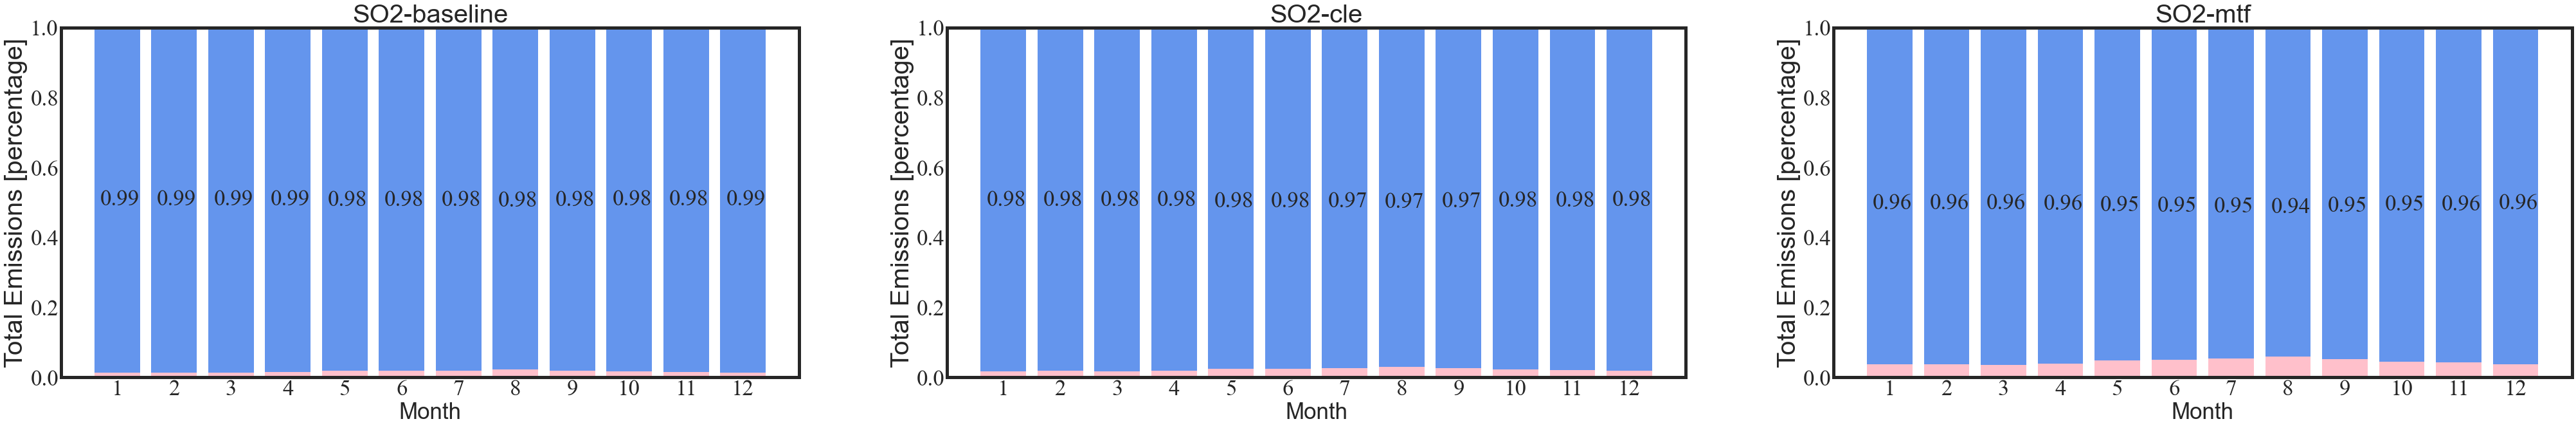

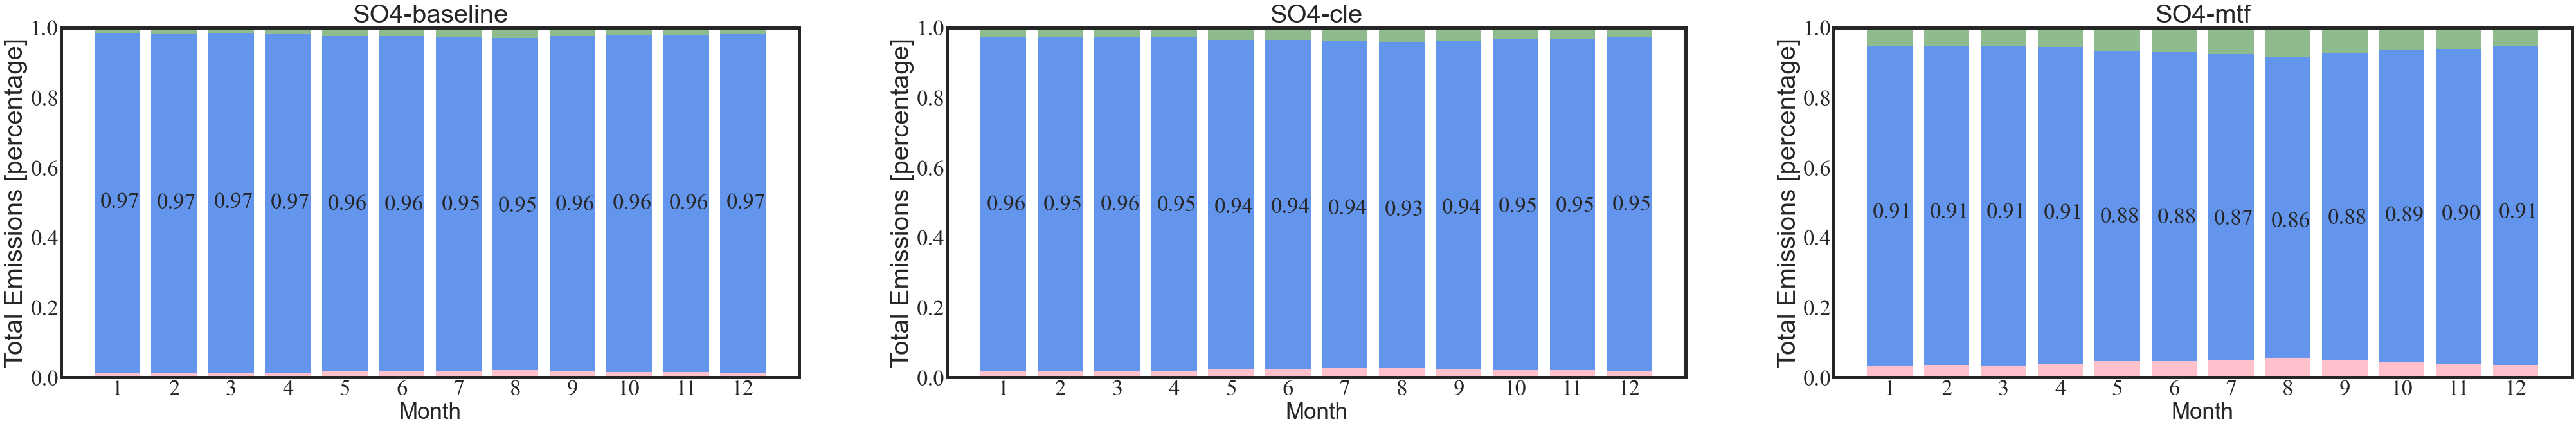

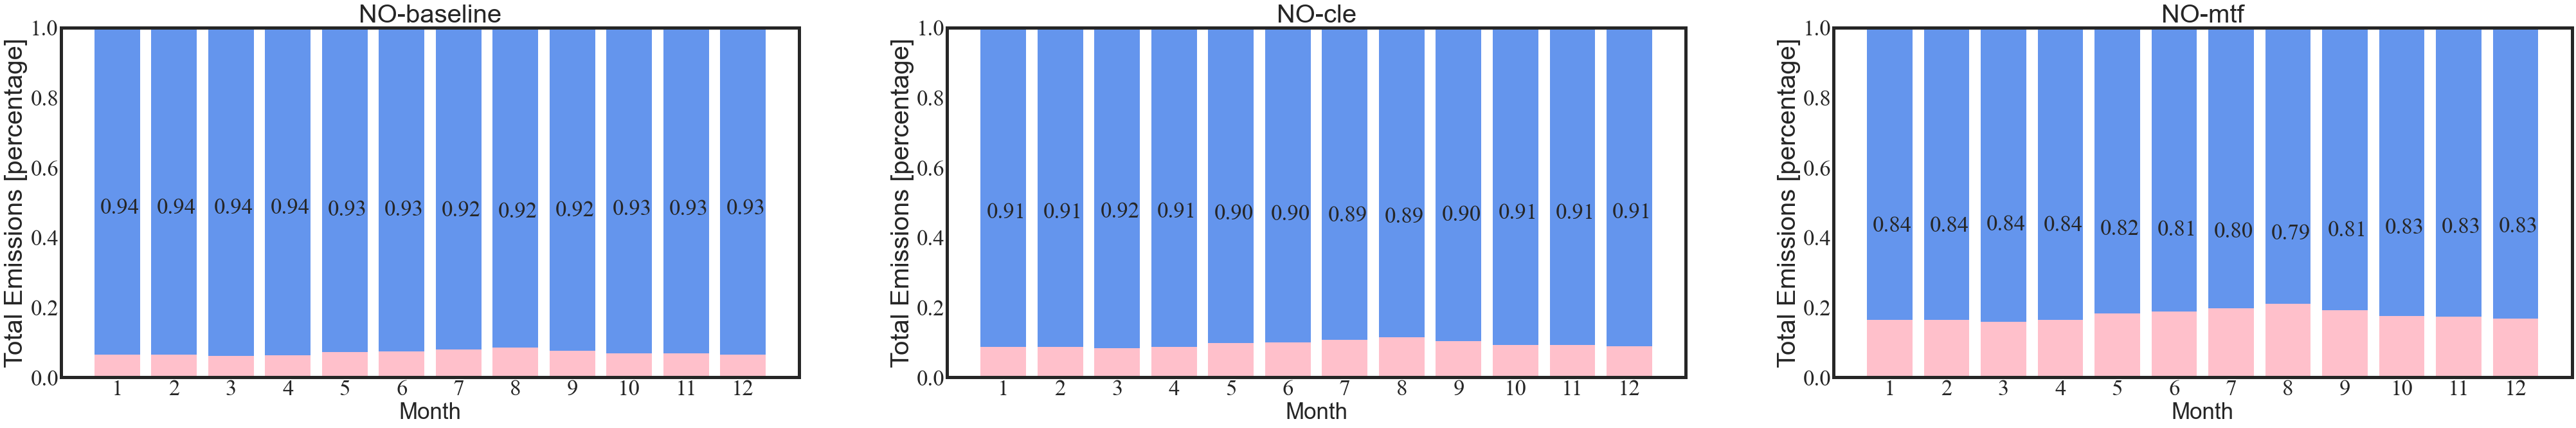

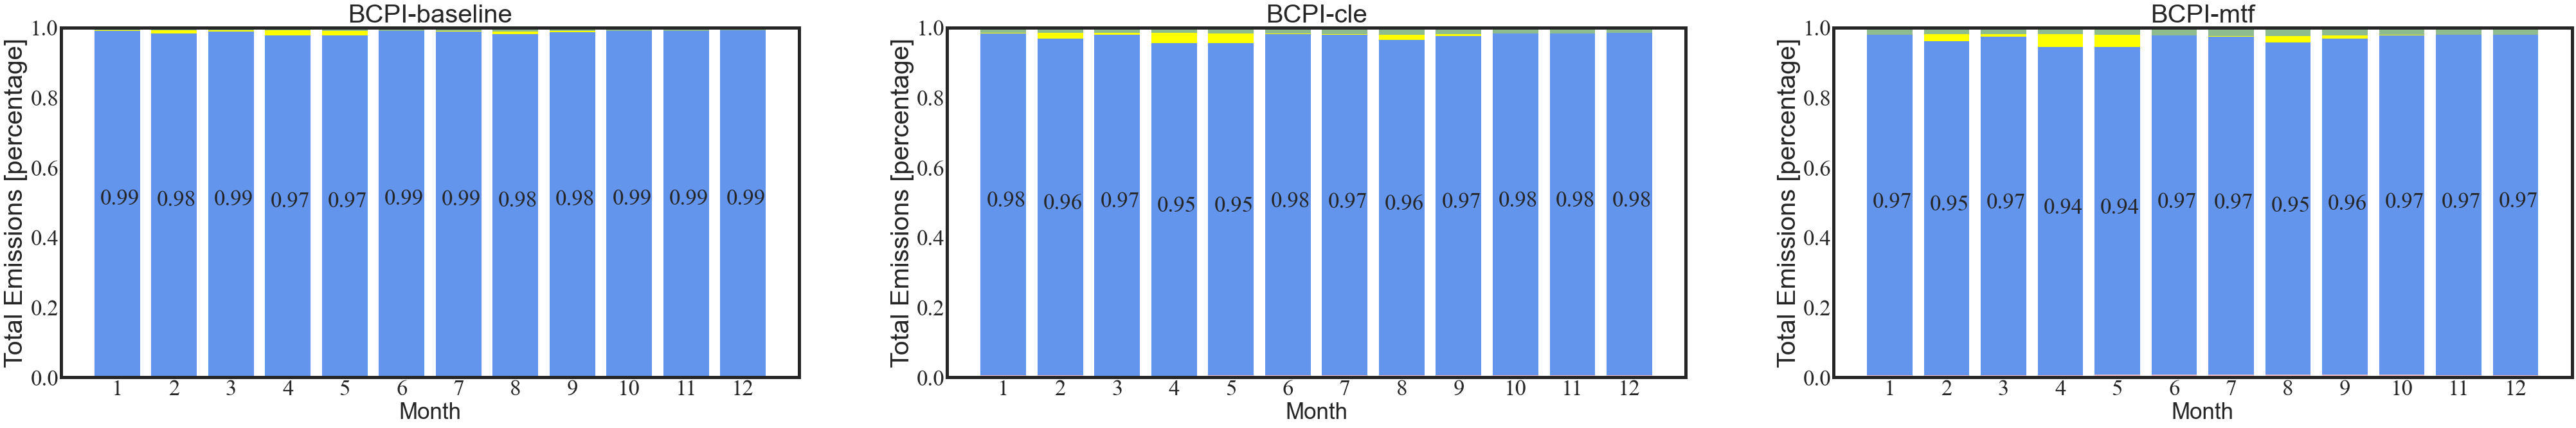

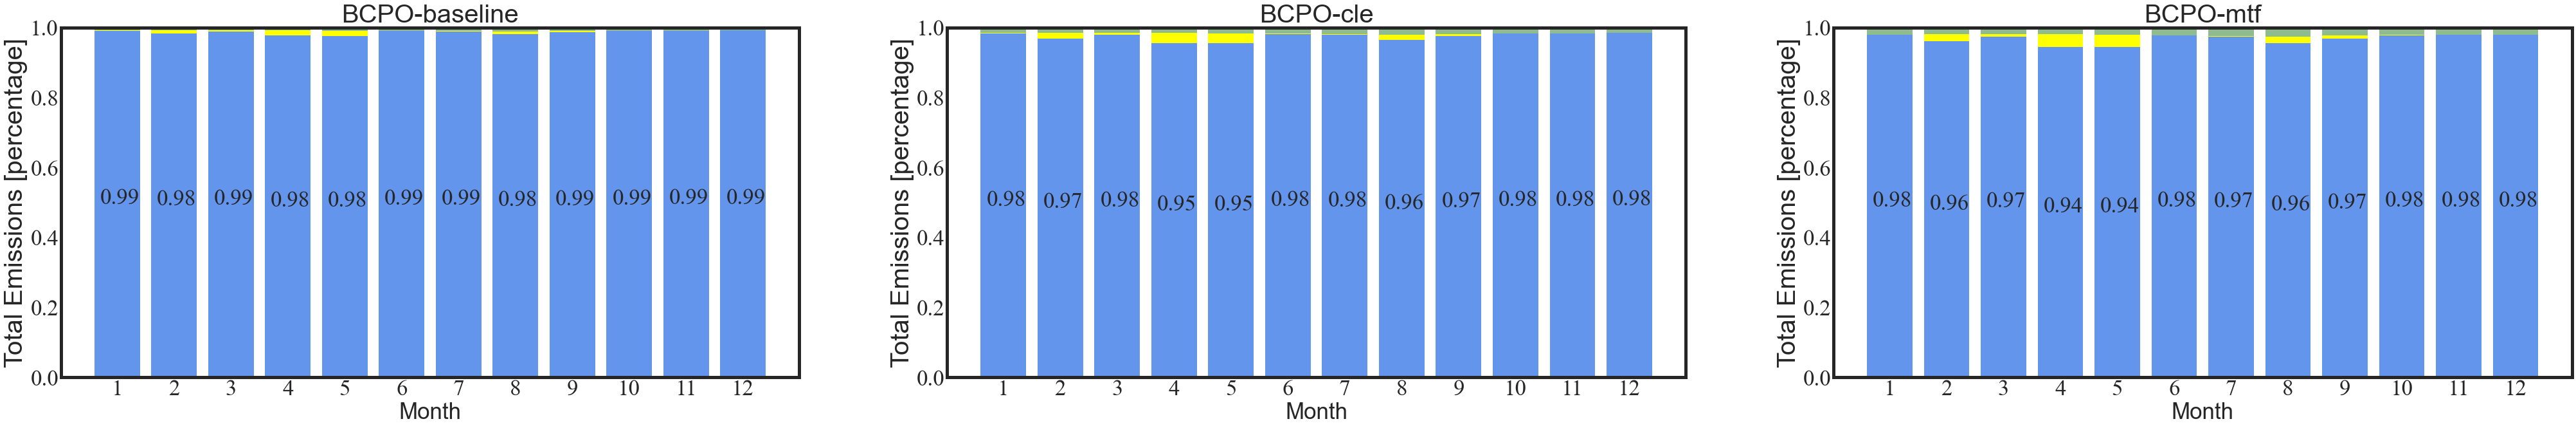

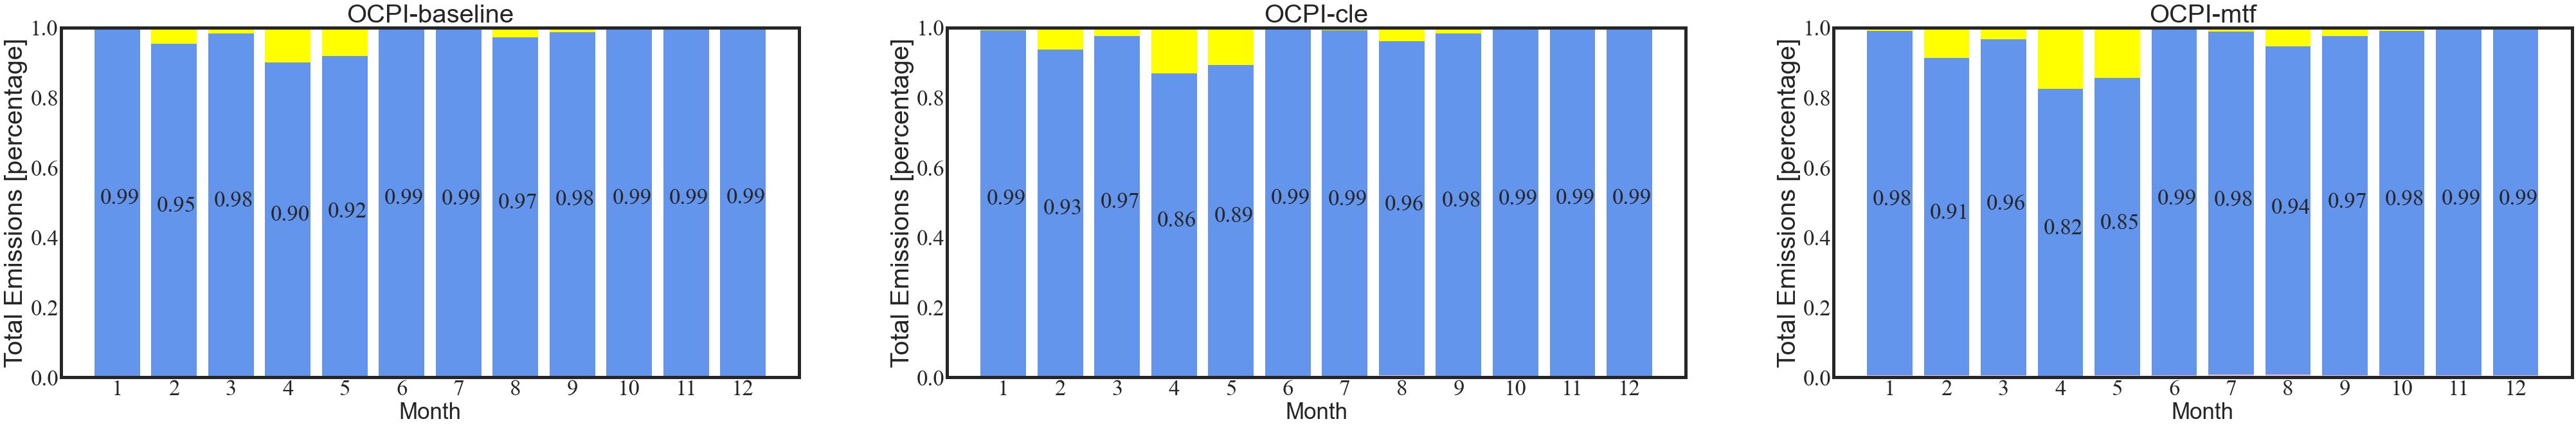

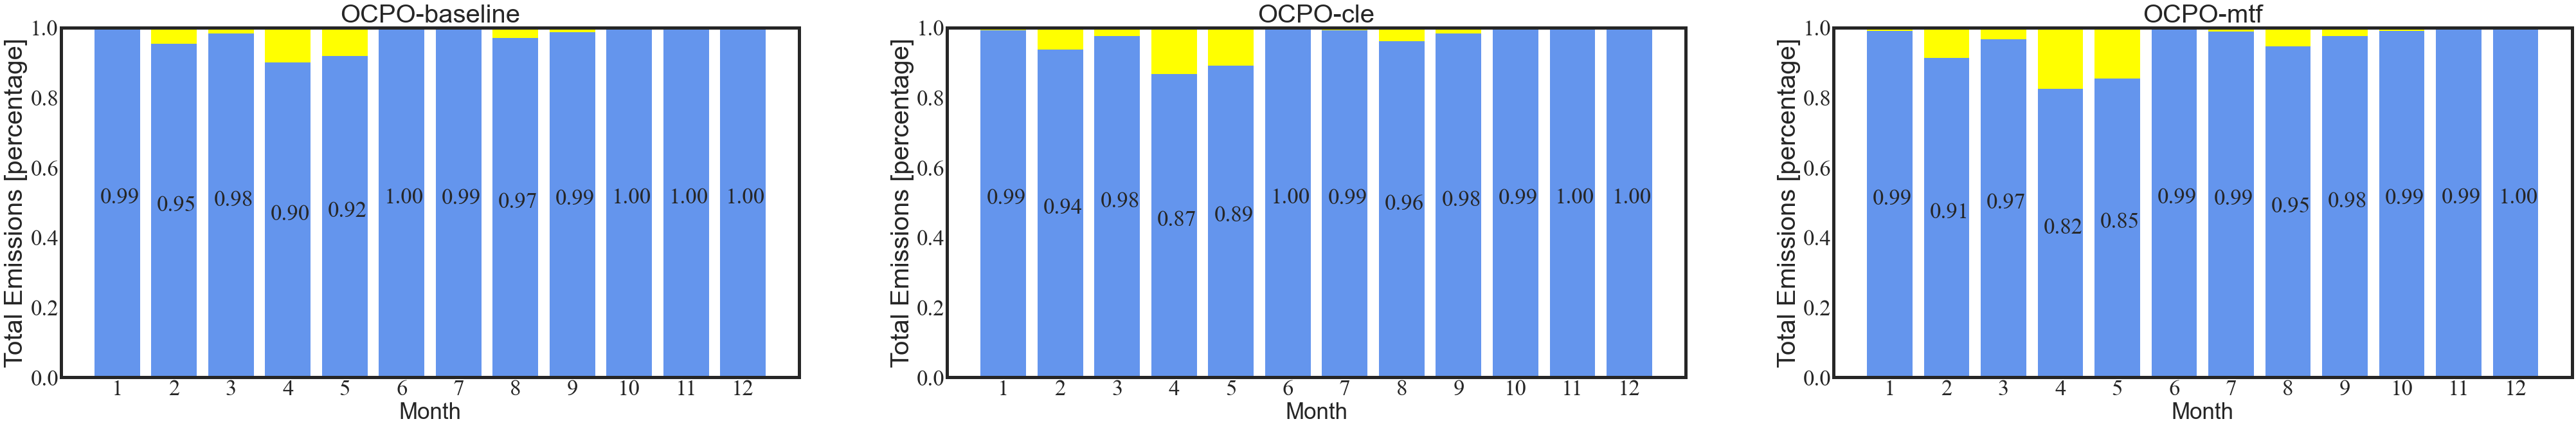

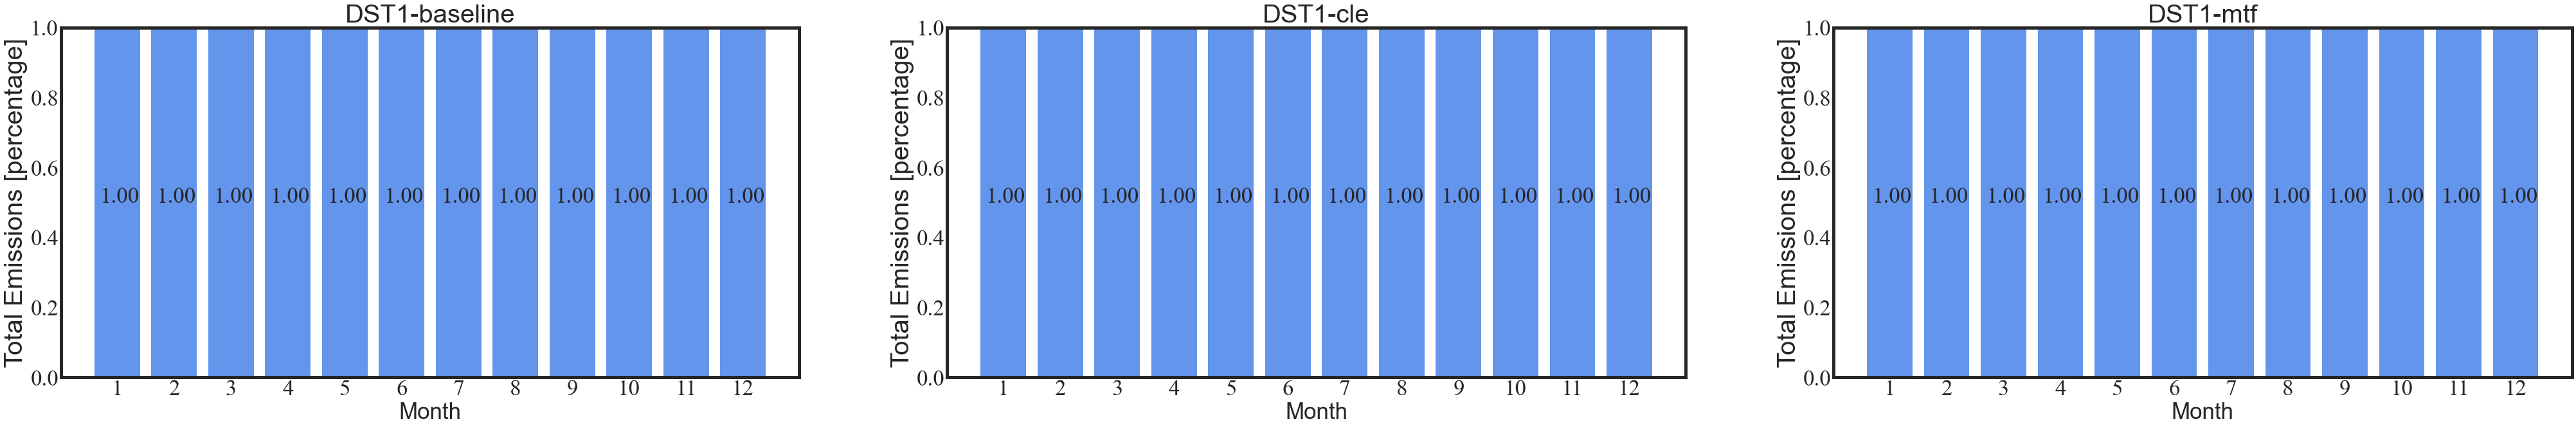

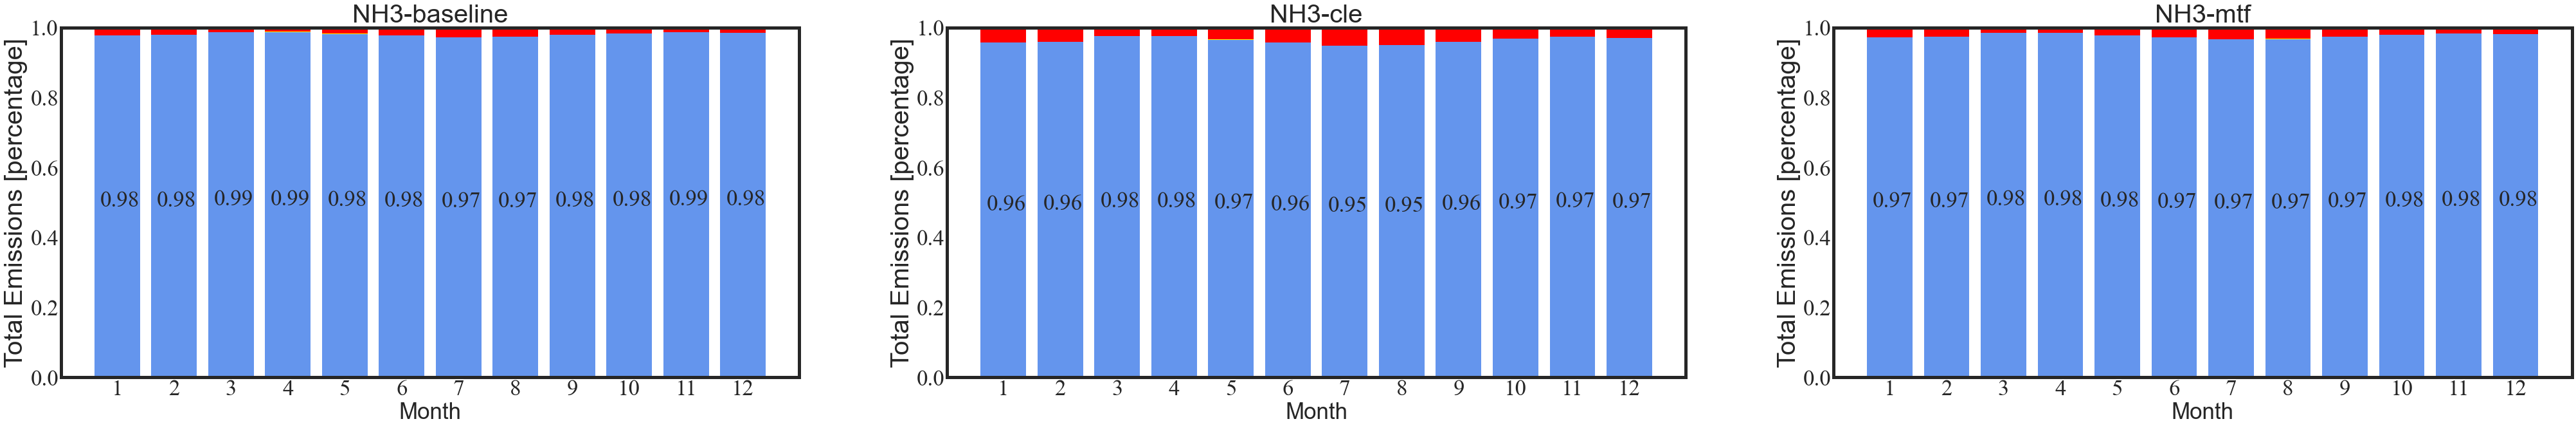

In [275]:
# plot percentage stacked bar chart of each compound
for compound in compounds:
    fig, ax = plt.subplots(figsize=(70, 10))
    for i in range(len(scenarios)):
        ax = plt.subplot(131+i)
        if compound == "SO2":            
            locals()[scenarios[i] + compound + "summ"] = np.array(locals()[scenarios[i] + compound + "Aircraft" + "_monthly_sum"]) + np.array(locals()[scenarios[i] + compound + "Anthro" + "_monthly_sum"])
            + np.array(locals()[scenarios[i] + compound + "BioBurn" + "_monthly_sum"]) + np.array(locals()[scenarios[i] + compound + "Ship" + "_monthly_sum"])
            + np.array(locals()[scenarios[i] + compound + "VolcDegas" + "_monthly_sum"]) + np.array(locals()[scenarios[i] + compound + "VolcErupt" + "_monthly_sum"])
            locals()[scenarios[i] + compound + "Aircraft" + "_percentage"] = locals()[scenarios[i] + compound + "Aircraft" + "_monthly_sum"]/locals()[scenarios[i] + compound + "summ"]
            locals()[scenarios[i] + compound + "Anthro" + "_percentage"] = locals()[scenarios[i] + compound + "Anthro" + "_monthly_sum"]/locals()[scenarios[i] + compound + "summ"]
            locals()[scenarios[i] + compound + "BioBurn" + "_percentage"] = locals()[scenarios[i] + compound + "BioBurn" + "_monthly_sum"]/locals()[scenarios[i] + compound + "summ"]
            locals()[scenarios[i] + compound + "Ship" + "_percentage"] = locals()[scenarios[i] + compound + "Ship" + "_monthly_sum"]/locals()[scenarios[i] + compound + "summ"]
            locals()[scenarios[i] + compound + "VolcDegas" + "_percentage"] = locals()[scenarios[i] + compound + "VolcDegas" + "_monthly_sum"]/locals()[scenarios[i] + compound + "summ"]
            locals()[scenarios[i] + compound + "VolcErupt" + "_percentage"] = locals()[scenarios[i] + compound + "VolcErupt" + "_monthly_sum"]/locals()[scenarios[i] + compound + "summ"]
            ax.bar(month, locals()[scenarios[i] + compound + "Aircraft" + "_percentage"], color="pink", label="Aircraft")
            ax.bar(month, locals()[scenarios[i] + compound + "Anthro" + "_percentage"], color="cornflowerblue", bottom=locals()[scenarios[i] + compound + "Aircraft" + "_percentage"], label="Anthro")
            ax.bar(month, locals()[scenarios[i] + compound + "BioBurn" + "_percentage"], color="yellow",bottom=np.array(locals()[scenarios[i] + compound + "Aircraft" + "_percentage"]) + np.array(locals()[scenarios[i]+ compound + "Anthro" + "_percentage"]), label="BioBurn")
            ax.bar(month, locals()[scenarios[i] + compound + "Ship" + "_percentage"], color="darkseagreen",
                   bottom=np.array(locals()[scenarios[i] + compound + "Aircraft" + "_percentage"]) + np.array(locals()[scenarios[i]+ compound + "Anthro" + "_percentage"]) + np.array(locals()[scenarios[i] + compound + "BioBurn" + "_percentage"]) , label="Ship")
            ax.bar(month, locals()[scenarios[i] + compound + "VolcDegas" + "_percentage"], color="saddlebrown",
                   bottom=np.array(locals()[scenarios[i] + compound + "Aircraft" + "_percentage"]) + np.array(locals()[scenarios[i]+ compound + "Anthro" + "_percentage"]) + np.array(locals()[scenarios[i] + compound + "BioBurn" + "_percentage"]) + np.array(locals()[scenarios[i] + compound + "Ship" + "_percentage"]) , label="VolcErupt")
            ax.bar(month, locals()[scenarios[i] + compound + "VolcErupt" + "_percentage"], color="c",
                   bottom=np.array(locals()[scenarios[i] + compound + "Aircraft" + "_percentage"]) + np.array(locals()[scenarios[i]+ compound + "Anthro" + "_percentage"]) + np.array(locals()[scenarios[i] + compound + "BioBurn" + "_percentage"]) + np.array(locals()[scenarios[i] + compound + "Ship" + "_percentage"]) + np.array(locals()[scenarios[i] + compound + "VolcErupt" + "_percentage"]) , label="VolcDegas")        
        if compound == "SO4":
            locals()[scenarios[i] + compound + "summ"] = np.array(locals()[scenarios[i] + compound + "Aircraft" + "_monthly_sum"]) + np.array(locals()[scenarios[i] + compound + "Anthro" + "_monthly_sum"]) + np.array(locals()[scenarios[i] + compound + "Ship" + "_monthly_sum"])
            locals()[scenarios[i] + compound + "Aircraft" + "_percentage"] = locals()[scenarios[i] + compound + "Aircraft" + "_monthly_sum"]/locals()[scenarios[i] + compound + "summ"]
            locals()[scenarios[i] + compound + "Anthro" + "_percentage"] = locals()[scenarios[i] + compound + "Anthro" + "_monthly_sum"]/locals()[scenarios[i] + compound + "summ"]
            locals()[scenarios[i] + compound + "Ship" + "_percentage"] = locals()[scenarios[i] + compound + "Ship" + "_monthly_sum"]/locals()[scenarios[i] + compound + "summ"]
            ax.bar(month, locals()[scenarios[i] + compound + "Aircraft" + "_percentage"], color="pink", label="Aircraft")
            ax.bar(month, locals()[scenarios[i] + compound + "Anthro" + "_percentage"], color="cornflowerblue", bottom=locals()[scenarios[i] + compound + "Aircraft" + "_percentage"], label="Anthro")
            ax.bar(month, locals()[scenarios[i] + compound + "Ship" + "_percentage"], color="darkseagreen",
                   bottom=np.array(locals()[scenarios[i] + compound + "Aircraft" + "_percentage"]) + np.array(locals()[scenarios[i]+ compound + "Anthro" + "_percentage"]), label="Ship")        
        if compound == "NO": 
            locals()[scenarios[i] + compound + "summ"] = np.array(locals()[scenarios[i] + compound + "Aircraft" + "_monthly_sum"]) + np.array(locals()[scenarios[i] + compound + "Anthro" + "_monthly_sum"])
            + np.array(locals()[scenarios[i] + compound + "BioBurn" + "_monthly_sum"]) + np.array(locals()[scenarios[i] + compound + "Lightning" + "_monthly_sum"])
            + np.array(locals()[scenarios[i] + compound + "Ship" + "_monthly_sum"]) + np.array(locals()[scenarios[i] + compound + "Soil" + "_monthly_sum"])
            locals()[scenarios[i] + compound + "Aircraft" + "_percentage"] = locals()[scenarios[i] + compound + "Aircraft" + "_monthly_sum"] / locals()[scenarios[i] + compound + "summ"]
            locals()[scenarios[i] + compound + "Anthro" + "_percentage"] = locals()[scenarios[i] + compound + "Anthro" + "_monthly_sum"] / locals()[scenarios[i] + compound + "summ"]
            locals()[scenarios[i] + compound + "BioBurn" + "_percentage"] = locals()[scenarios[i] + compound + "BioBurn" + "_monthly_sum"] / locals()[scenarios[i] + compound + "summ"]
            locals()[scenarios[i] + compound + "Lightning" + "_percentage"] = locals()[scenarios[i] + compound + "Lightning" + "_monthly_sum"] / locals()[scenarios[i] + compound + "summ"]
            locals()[scenarios[i] + compound + "Ship" + "_percentage"] = locals()[scenarios[i] + compound + "Ship" + "_monthly_sum"] / locals()[scenarios[i] + compound + "summ"]
            locals()[scenarios[i] + compound + "Soil" + "_percentage"] = locals()[scenarios[i] + compound + "Soil" + "_monthly_sum"] / locals()[scenarios[i] + compound + "summ"]
            ax.bar(month, locals()[scenarios[i] + compound + "Aircraft" + "_percentage"], color="pink", label="Aircraft")
            ax.bar(month, locals()[scenarios[i] + compound + "Anthro" + "_percentage"], color="cornflowerblue", bottom=locals()[scenarios[i] + compound + "Aircraft" + "_percentage"], label="Anthro")
            ax.bar(month, locals()[scenarios[i] + compound + "BioBurn" + "_percentage"], color="yellow",
                   bottom=np.array(locals()[scenarios[i] + compound + "Aircraft" + "_percentage"]) + np.array(locals()[scenarios[i]+ compound + "Anthro" + "_percentage"]), label="BioBurn")
            ax.bar(month, locals()[scenarios[i] + compound + "Lightning" + "_percentage"], color="purple",
                   bottom=np.array(locals()[scenarios[i] + compound + "Aircraft" + "_percentage"]) + np.array(locals()[scenarios[i]+ compound + "Anthro" + "_percentage"]) + np.array(locals()[scenarios[i]+ compound + "BioBurn" + "_percentage"]), label="Lightning")
            ax.bar(month, locals()[scenarios[i] + compound + "Ship" + "_percentage"], color="darkseagreen",
                   bottom=np.array(locals()[scenarios[i] + compound + "Aircraft" + "_percentage"]) + np.array(locals()[scenarios[i]+ compound + "Anthro" + "_percentage"]) + np.array(locals()[scenarios[i]+ compound + "BioBurn" + "_percentage"]) + np.array(locals()[scenarios[i]+ compound + "Lightning" + "_percentage"]), label="Ship")
            ax.bar(month, locals()[scenarios[i] + compound + "Soil" + "_percentage"], color="peru",
                   bottom=np.array(locals()[scenarios[i] + compound + "Aircraft" + "_percentage"]) + np.array(locals()[scenarios[i]+ compound + "Anthro" + "_percentage"]) + np.array(locals()[scenarios[i]+ compound + "BioBurn" + "_percentage"]) + np.array(locals()[scenarios[i]+ compound + "Lightning" + "_percentage"]) + np.array(locals()[scenarios[i]+ compound + "Ship" + "_percentage"]), label="Soil")
        if compound == "BCPI":
            locals()[scenarios[i] + compound + "summ"] = np.array(locals()[scenarios[i] + compound + "Aircraft" + "_monthly_sum"]) + np.array(locals()[scenarios[i] + compound + "Anthro" + "_monthly_sum"]) + np.array(locals()[scenarios[i] + compound + "BioBurn" + "_monthly_sum"]) + np.array(locals()[scenarios[i] + compound + "Ship" + "_monthly_sum"])
            locals()[scenarios[i] + compound + "Aircraft" + "_percentage"] = locals()[scenarios[i] + compound + "Aircraft" + "_monthly_sum"] / locals()[scenarios[i] + compound + "summ"]
            locals()[scenarios[i] + compound + "Anthro" + "_percentage"] = locals()[scenarios[i] + compound + "Anthro" + "_monthly_sum"] / locals()[scenarios[i] + compound + "summ"]
            locals()[scenarios[i] + compound + "BioBurn" + "_percentage"] = locals()[scenarios[i] + compound + "BioBurn" + "_monthly_sum"] / locals()[scenarios[i] + compound + "summ"]
            locals()[scenarios[i] + compound + "Ship" + "_percentage"] = locals()[scenarios[i] + compound + "Ship" + "_monthly_sum"] / locals()[scenarios[i] + compound + "summ"]
            ax.bar(month, locals()[scenarios[i] + compound + "Aircraft" + "_percentage"], color="pink", label="Aircraft")
            ax.bar(month, locals()[scenarios[i] + compound + "Anthro" + "_percentage"], color="cornflowerblue", bottom=locals()[scenarios[i] + compound + "Aircraft" + "_percentage"], label="Anthro")
            ax.bar(month, locals()[scenarios[i] + compound + "BioBurn" + "_percentage"], color="yellow",
                   bottom=np.array(locals()[scenarios[i] + compound + "Aircraft" + "_percentage"]) + np.array(locals()[scenarios[i]+ compound + "Anthro" + "_percentage"]), label="BioBurn")
            ax.bar(month, locals()[scenarios[i] + compound + "Ship" + "_percentage"], color="darkseagreen",
                   bottom=np.array(locals()[scenarios[i] + compound + "Aircraft" + "_percentage"]) + np.array(locals()[scenarios[i]+ compound + "Anthro" + "_percentage"]) + np.array(locals()[scenarios[i]+ compound + "BioBurn" + "_percentage"]), label="Ship")
        if compound == "BCPO":
            locals()[scenarios[i] + compound + "summ"] = np.array(locals()[scenarios[i] + compound + "Anthro" + "_monthly_sum"]) + np.array(locals()[scenarios[i] + compound + "BioBurn" + "_monthly_sum"]) + np.array(locals()[scenarios[i] + compound + "Ship" + "_monthly_sum"])
            locals()[scenarios[i] + compound + "Anthro" + "_percentage"] = locals()[scenarios[i] + compound + "Anthro" + "_monthly_sum"] / locals()[scenarios[i] + compound + "summ"]
            locals()[scenarios[i] + compound + "BioBurn" + "_percentage"] = locals()[scenarios[i] + compound + "BioBurn" + "_monthly_sum"] / locals()[scenarios[i] + compound + "summ"]
            locals()[scenarios[i] + compound + "Ship" + "_percentage"] = locals()[scenarios[i] + compound + "Ship" + "_monthly_sum"] / locals()[scenarios[i] + compound + "summ"]
            ax.bar(month, locals()[scenarios[i] + compound + "Anthro" + "_percentage"], color="cornflowerblue", label="Anthro")
            ax.bar(month, locals()[scenarios[i] + compound + "BioBurn" + "_percentage"], color="yellow", bottom=locals()[scenarios[i] + compound + "Anthro" + "_percentage"], label="BioBurn")
            ax.bar(month, locals()[scenarios[i] + compound + "Ship" + "_percentage"], color="darkseagreen",
                   bottom=np.array(locals()[scenarios[i] + compound + "Anthro" + "_percentage"]) + np.array(locals()[scenarios[i]+ compound + "BioBurn" + "_percentage"]), label="Ship")
        if compound == "OCPI":
            locals()[scenarios[i] + compound + "summ"] = np.array(locals()[scenarios[i] + compound + "Aircraft" + "_monthly_sum"]) + np.array(locals()[scenarios[i] + compound + "Anthro" + "_monthly_sum"]) + np.array(locals()[scenarios[i] + compound + "BioBurn" + "_monthly_sum"]) + np.array(locals()[scenarios[i] + compound + "Ship" + "_monthly_sum"])
            locals()[scenarios[i] + compound + "Aircraft" + "_percentage"] = locals()[scenarios[i] + compound + "Aircraft" + "_monthly_sum"] / locals()[scenarios[i] + compound + "summ"]
            locals()[scenarios[i] + compound + "Anthro" + "_percentage"] = locals()[scenarios[i] + compound + "Anthro" + "_monthly_sum"] / locals()[scenarios[i] + compound + "summ"]
            locals()[scenarios[i] + compound + "BioBurn" + "_percentage"] = locals()[scenarios[i] + compound + "BioBurn" + "_monthly_sum"] / locals()[scenarios[i] + compound + "summ"]
            locals()[scenarios[i] + compound + "Ship" + "_percentage"] = locals()[scenarios[i] + compound + "Ship" + "_monthly_sum"] / locals()[scenarios[i] + compound + "summ"]
            ax.bar(month, locals()[scenarios[i] + compound + "Aircraft" + "_percentage"], color="pink", label="Aircraft")
            ax.bar(month, locals()[scenarios[i] + compound + "Anthro" + "_percentage"], color="cornflowerblue", bottom=locals()[scenarios[i] + compound + "Aircraft" + "_percentage"], label="Anthro")
            ax.bar(month, locals()[scenarios[i] + compound + "BioBurn" + "_percentage"], color="yellow",
                   bottom=np.array(locals()[scenarios[i] + compound + "Aircraft" + "_percentage"]) + np.array(locals()[scenarios[i]+ compound + "Anthro" + "_percentage"]), label="BioBurn")
            ax.bar(month, locals()[scenarios[i] + compound + "Ship" + "_percentage"], color="darkseagreen",
                   bottom=np.array(locals()[scenarios[i] + compound + "Aircraft" + "_percentage"]) + np.array(locals()[scenarios[i]+ compound + "Anthro" + "_percentage"]) + np.array(locals()[scenarios[i]+ compound + "BioBurn" + "_percentage"]), label="Ship")
        if compound == "OCPO":
            locals()[scenarios[i] + compound + "summ"] = np.array(locals()[scenarios[i] + compound + "Anthro" + "_monthly_sum"]) + np.array(locals()[scenarios[i] + compound + "BioBurn" + "_monthly_sum"]) + np.array(locals()[scenarios[i] + compound + "Ship" + "_monthly_sum"])
            locals()[scenarios[i] + compound + "Anthro" + "_percentage"] = locals()[scenarios[i] + compound + "Anthro" + "_monthly_sum"] / locals()[scenarios[i] + compound + "summ"]
            locals()[scenarios[i] + compound + "BioBurn" + "_percentage"] = locals()[scenarios[i] + compound + "BioBurn" + "_monthly_sum"] / locals()[scenarios[i] + compound + "summ"]
            locals()[scenarios[i] + compound + "Ship" + "_percentage"] = locals()[scenarios[i] + compound + "Ship" + "_monthly_sum"] / locals()[scenarios[i] + compound + "summ"]
            ax.bar(month, locals()[scenarios[i] + compound + "Anthro" + "_percentage"], color="cornflowerblue", label="Anthro")
            ax.bar(month, locals()[scenarios[i] + compound + "BioBurn" + "_percentage"], color="yellow", bottom=locals()[scenarios[i] + compound + "Anthro" + "_percentage"], label="BioBurn")
            ax.bar(month, locals()[scenarios[i] + compound + "Ship" + "_percentage"], color="darkseagreen",
                   bottom=np.array(locals()[scenarios[i] + compound + "Anthro" + "_percentage"]) + np.array(locals()[scenarios[i]+ compound + "BioBurn" + "_percentage"]), label="Ship")
        if compound == "DST1":
            locals()[scenarios[i] + compound + "summ"] = np.array(locals()[scenarios[i] + compound + "Anthro" + "_monthly_sum"]) + np.array(locals()[scenarios[i] + compound + "Natural" + "_monthly_sum"])
            locals()[scenarios[i] + compound + "Anthro" + "_percentage"] = locals()[scenarios[i] + compound + "Anthro" + "_monthly_sum"] / locals()[scenarios[i] + compound + "summ"]
            locals()[scenarios[i] + compound + "Natural" + "_percentage"] = locals()[scenarios[i] + compound + "Natural" + "_monthly_sum"] / locals()[scenarios[i] + compound + "summ"]
            ax.bar(month, locals()[scenarios[i] + compound + "Anthro" + "_percentage"], color="cornflowerblue", label="Anthro")
            ax.bar(month, locals()[scenarios[i] + compound + "Natural" + "_percentage"], color="red", bottom=locals()[scenarios[i] + compound + "Anthro" + "_percentage"], label="Natural")
        if compound == "NH3":
            locals()[scenarios[i] + compound + "summ"] = np.array(locals()[scenarios[i] + compound + "Anthro" + "_monthly_sum"]) + np.array(locals()[scenarios[i] + compound + "BioBurn" + "_monthly_sum"]) + np.array(locals()[scenarios[i] + compound + "Natural" + "_monthly_sum"]) 
            + np.array(locals()[scenarios[i] + compound + "Seabirds" + "_monthly_sum"]) + np.array(locals()[scenarios[i] + compound + "Ship" + "_monthly_sum"])
            locals()[scenarios[i] + compound + "Anthro" + "_percentage"] = locals()[scenarios[i] + compound + "Anthro" + "_monthly_sum"] / locals()[scenarios[i] + compound + "summ"]
            locals()[scenarios[i] + compound + "BioBurn" + "_percentage"] = locals()[scenarios[i] + compound + "BioBurn" + "_monthly_sum"] / locals()[scenarios[i] + compound + "summ"]
            locals()[scenarios[i] + compound + "Natural" + "_percentage"] = locals()[scenarios[i] + compound + "Natural" + "_monthly_sum"] / locals()[scenarios[i] + compound + "summ"]
            locals()[scenarios[i] + compound + "Seabirds" + "_percentage"] = locals()[scenarios[i] + compound + "Seabirds" + "_monthly_sum"] / locals()[scenarios[i] + compound + "summ"]
            locals()[scenarios[i] + compound + "Ship" + "_percentage"] = locals()[scenarios[i] + compound + "Ship" + "_monthly_sum"] / locals()[scenarios[i] + compound + "summ"]
            ax.bar(month, locals()[scenarios[i] + compound + "Anthro" + "_percentage"], color="cornflowerblue", label="Anthro")
            ax.bar(month, locals()[scenarios[i] + compound + "BioBurn" + "_percentage"], color="yellow", bottom=locals()[scenarios[i] + compound + "Anthro" + "_percentage"], label="BioBurn")
            ax.bar(month, locals()[scenarios[i] + compound + "Natural" + "_percentage"], color="red",
                   bottom=np.array(locals()[scenarios[i] + compound + "Anthro" + "_percentage"]) + np.array(locals()[scenarios[i]+ compound + "BioBurn" + "_percentage"]), label="Natural")
            ax.bar(month, locals()[scenarios[i] + compound + "Seabirds" + "_percentage"], color="darkorange",
                   bottom=np.array(locals()[scenarios[i] + compound + "Anthro" + "_percentage"]) + np.array(locals()[scenarios[i]+ compound + "BioBurn" + "_percentage"]) + np.array(locals()[scenarios[i]+ compound + "Natural" + "_percentage"]), label="Seabirds")
            ax.bar(month, locals()[scenarios[i] + compound + "Ship" + "_percentage"], color="darkseagreen",
                   bottom=np.array(locals()[scenarios[i] + compound + "Anthro" + "_percentage"]) + np.array(locals()[scenarios[i]+ compound + "BioBurn" + "_percentage"]) + np.array(locals()[scenarios[i]+ compound + "Natural" + "_percentage"]) + np.array(locals()[scenarios[i]+ compound + "Seabirds" + "_percentage"]), label="Ship")
        plt.title(f'{compound}-{scenarios[i]}',fontsize=40)
        plt.ylabel('Total Emissions [percentage]',fontsize = 40)
        plt.xlabel('Month',fontsize = 35)
        ax.spines['bottom'].set_linewidth(5)
        ax.spines['left'].set_linewidth(5)
        ax.spines['top'].set_linewidth(5)
        ax.spines['right'].set_linewidth(5)
        ax.set_ylim(0,1)
        plt.xticks(month,fontsize=35,font='Times New Roman') 
        plt.yticks(fontsize=35,font='Times New Roman')
        plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.2,hspace=0.1)
#         ax.legend()

        # only add the percentage of Anthro
        y_Anthro = locals()[scenarios[i] + compound + "Anthro" + "_percentage"]/2
        add_text(month-0.3, y_Anthro, locals()[scenarios[i] + compound + "Anthro" + "_percentage"])
        plt.savefig('D:/Jupyter code/PM output/percentage stacked bar chart.jpg', dpi=100)